Colab Link: https://colab.research.google.com/drive/1BnqV9FjDg0dmwcEz9jk8-ZgZVHcs7GzI?usp=sharing

# Midterm_Project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import levene
from scipy.stats import f_oneway, shapiro

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def get_table():
  return pd.read_csv('/content/drive/My Drive/INF2178/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

In [4]:
def g_book_table():
  return pd.read_excel('/content/drive/My Drive/INF2178/Booked.xlsx')

In [5]:
def graph_barplot(data,x,y,hue,title_name,colsize):
  plt.figure(figsize=(colsize,5),dpi=144)
  p=sns.barplot(data=data,x=x,y=y,hue=hue)
  p.legend(fontsize=6)
  plt.title(title_name,fontsize=9)
  plt.show

In [6]:
def graph_barplot_s(data,x,y,title_name,colsize):
  plt.figure(figsize=(colsize,5),dpi=144)
  p=sns.barplot(data=data,x=x,y=y)
  p.legend(fontsize=1)
  plt.title(title_name,fontsize=9)
  plt.show

In [7]:
def group_fun(table, col_name, id_vars):
  temp = table.groupby(col_name).size().unstack().reset_index(drop=False)
  temp2 = pd.melt(temp,id_vars=id_vars)
  return temp2

In [8]:
def graph_relplot(data,x,y,hue,style,title):
  plt.rcParams['font.size'] = '11'
  p=sns.relplot(data=data, x=x, y=y, hue=hue,style=style, height=7)
  p.set_xticklabels(fontsize=14)
  p.set_xticklabels(fontsize=14)
  p.set_yticklabels(fontsize=14)
  p.set_xlabels(fontsize=14)
  p.set_ylabels(fontsize=14)
  plt.title(title,fontsize=14)
  plt.show()

In [9]:
def line_chart(data,x,y,hue,title_name,style,colsize):
  plt.figure(figsize=(colsize,5),dpi=144)
  p=sns.lineplot(data=data,x=x,y=y,hue=hue,style=style)
  p.legend(fontsize=6)
  plt.title(title_name,fontsize=9)
  plt.show

In [10]:
def graph_lineplot_m(data,x,y,hue,style,title):
  plt.figure(figsize=(7,8),dpi=100)
  p=sns.lineplot(x=x, y=y,hue=hue,style=style,data=data)
  plt.title(title,fontsize=12)
  plt.show()

In [11]:
ass_table = get_table()
#data clean
ass_table = ass_table.replace('Aged 65 years and older','Aged 65 and older')
ass_table = ass_table.replace('Aged 17 years and under','Aged 17 years and younger')
ass_table.loc[ass_table["StripSearch"] == 1, "Booked"] = "1" 
ass_table=ass_table.drop(ass_table[ass_table['Sex']=='U'].index)

In [12]:

#ass_table[['StripSearch','Booked']].head(40)
#ass_table[ass_table["StripSearch"]==1]['Booked']
 

<Axes: xlabel='Arrest_Year'>

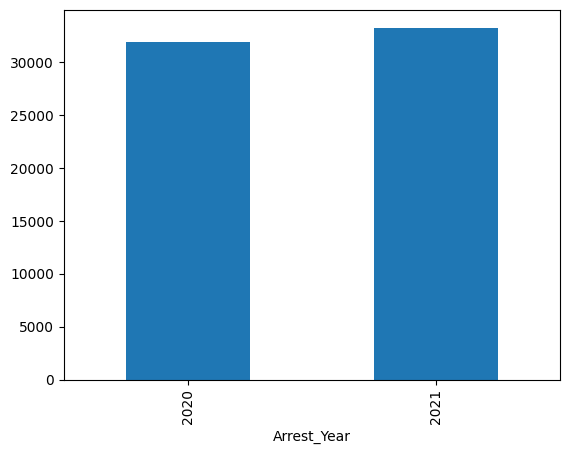

In [13]:
ass_table.groupby(['Arrest_Year']).size().plot(kind="bar")

In [14]:
perceived_count=ass_table['Perceived_Race'].value_counts().rename_axis('Perceived_Race').reset_index(name='count')
perceived_count

,Perceived_Race,count
0,White,27718
1,Black,17526
2,Unknown or Legacy,5053
3,East/Southeast Asian,4415
4,South Asian,3613
5,Middle-Eastern,3237
6,Indigenous,1934
7,Latino,1767


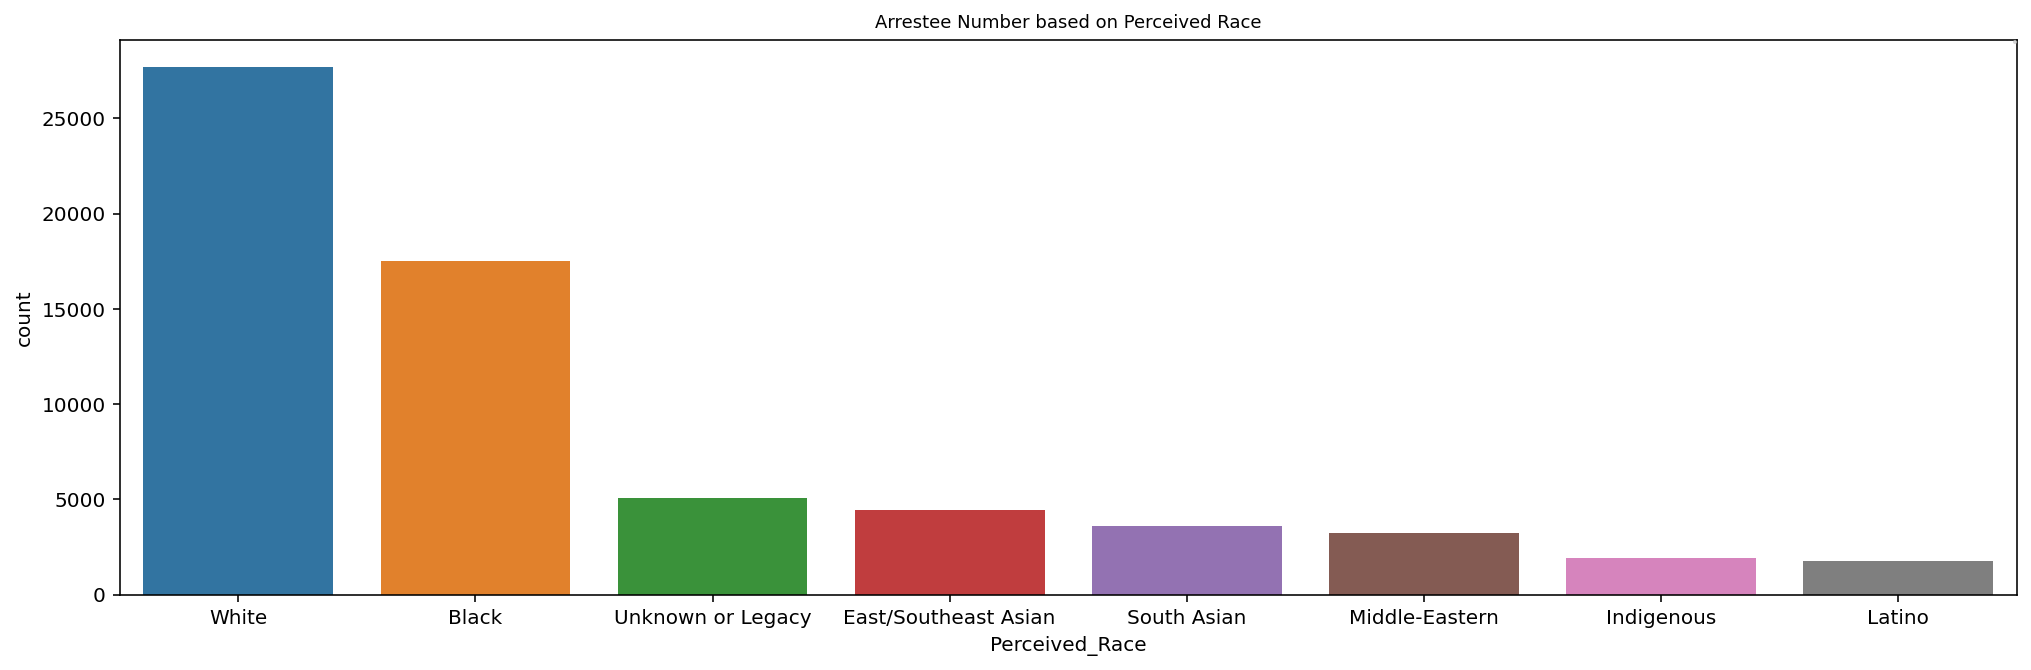

In [15]:
graph_barplot_s(perceived_count,'Perceived_Race','count','Arrestee Number based on Perceived Race',17)

In [16]:
#col_name1=['Sex']
#id_vars1=['Sex']
#sex_table=group_fun(ass_table,col_name1,id_vars1)
#sex_table = ass_table.groupby('').size().unstack().reset_index(drop=False)
sex_table=ass_table['Sex'].value_counts().rename_axis('Sex').reset_index(name='count')
sex_table

,Sex,count
0,M,52650
1,F,12617


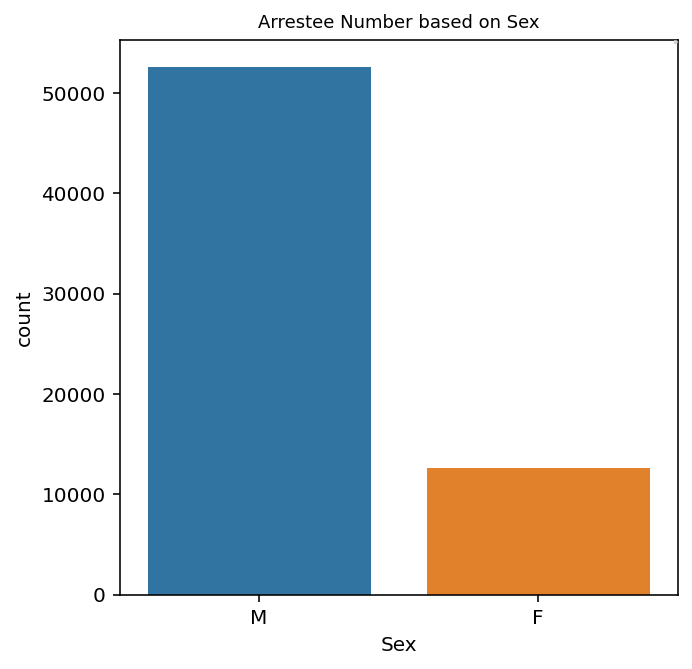

In [17]:
graph_barplot_s(sex_table,'Sex','count','Arrestee Number based on Sex',5)

In [18]:
#graph_barplot(sex_table,"Arrest_Year","value","Sex","Arrest Graph for 2020 and 2021")

In [19]:
col_name2=['Sex','Perceived_Race']
id_vars2=['Sex']
Perceived_Sex_table=group_fun(ass_table,col_name2,id_vars2)
Perceived_Sex_table

,Sex,Perceived_Race,value
0,F,Black,3012
1,M,Black,14514
2,F,East/Southeast Asian,745
3,M,East/Southeast Asian,3670
4,F,Indigenous,629
5,M,Indigenous,1305
6,F,Latino,264
7,M,Latino,1503
8,F,Middle-Eastern,364
9,M,Middle-Eastern,2873


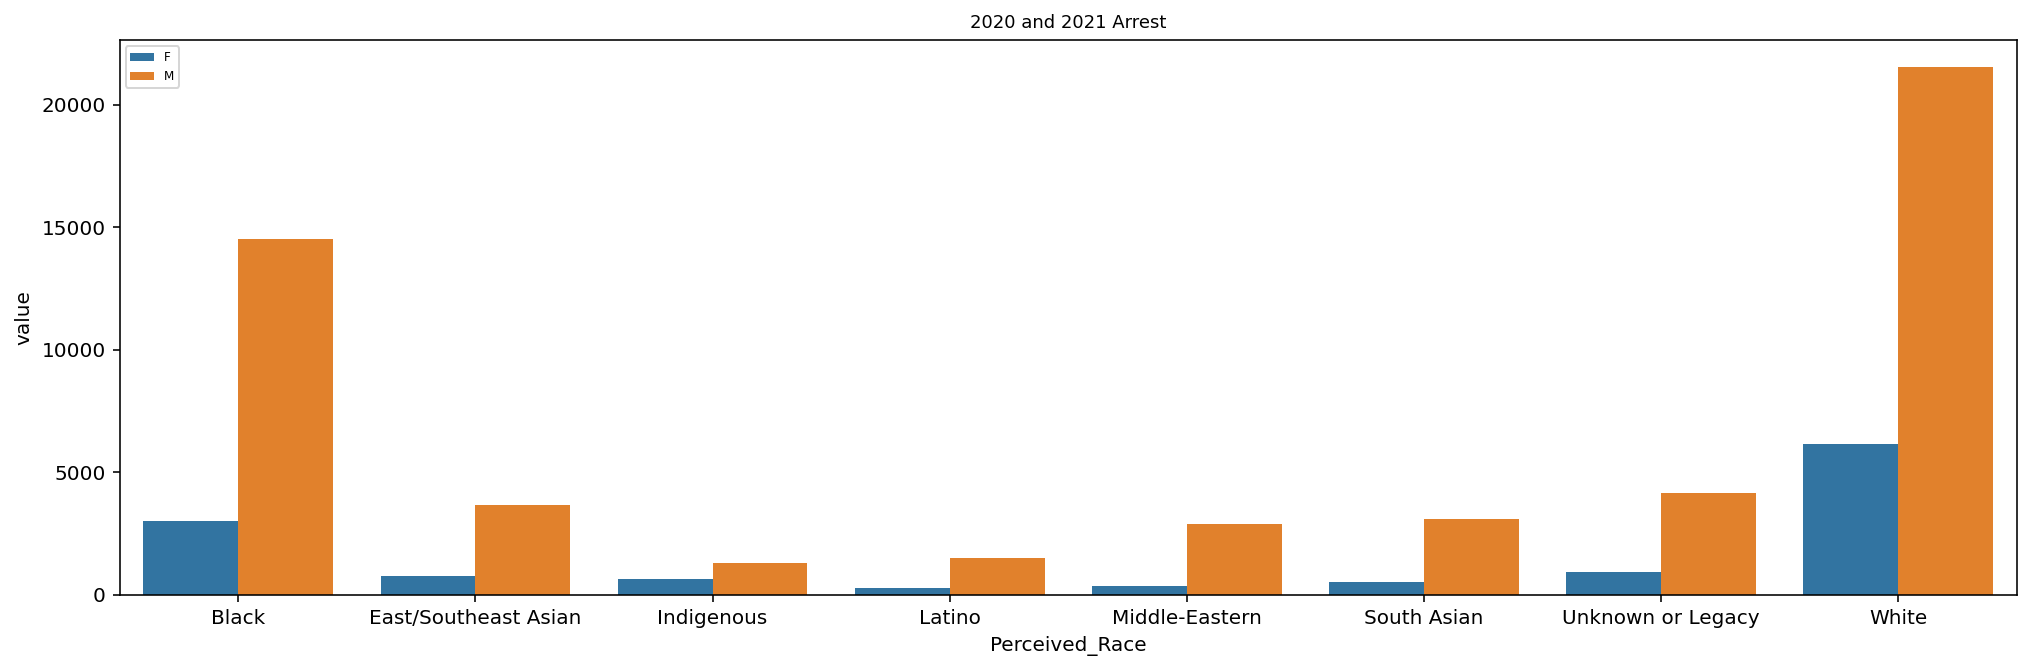

In [20]:
graph_barplot(Perceived_Sex_table,'Perceived_Race','value','Sex','2020 and 2021 Arrest',17)

In [21]:
#table_2020_arrest = Perceived_Race_table.loc[Perceived_Race_table["Arrest_Year"]==2020] 
#table_2021_arrest = Perceived_Race_table.loc[Perceived_Race_table["Arrest_Year"]==2021] 

In [22]:

#graph_barplot(table_2020_arrest,"Sex","value","Perceived_Race","Arrest Graph for 2020")

#graph_barplot(table_2021_arrest,"Sex","value","Perceived_Race","Arrest Graph for 2021")

In [23]:
#sns.relplot(data=Perceived_Race_table, x=Perceived_Race_table["Arrest_Year"], y="value", hue="Perceived_Race",style="Sex", height=7)
#graph_relplot(Perceived_Race_table,"Arrest_Year","value","Perceived_Race","Sex","Arrest Graph for 2020 and 2021")

In [24]:
#a_s_p_table =ass_table.groupby(['Arrest_Year','Sex','Perceived_Race']).size().unstack().reset_index(drop=False)
#a_s_p_table2=pd.melt(a_s_p_table,id_vars=['Arrest_Year','Sex'])

In [25]:
#a_s_p_table2

In [26]:
StripSearch_table =ass_table.groupby(['Arrest_Year','Sex','Perceived_Race','StripSearch']).size().unstack().reset_index(drop=False)
StripSearch_table.head()

StripSearch,Arrest_Year,Sex,Perceived_Race,0,1
0,2020,F,Black,1243.0,239.0
1,2020,F,East/Southeast Asian,311.0,23.0
2,2020,F,Indigenous,223.0,68.0
3,2020,F,Latino,99.0,10.0
4,2020,F,Middle-Eastern,172.0,15.0


In [27]:
# 是否需要更改名字 对youth age and younger 和 youth(aged 17 years and under)
age_table =ass_table.groupby(['Arrest_Year','Sex','Perceived_Race','StripSearch','Youth_at_arrest__under_18_years']).size().unstack().reset_index(drop=False)
age_table.head()

Youth_at_arrest__under_18_years,Arrest_Year,Sex,Perceived_Race,StripSearch,Not a youth,Youth (aged 17 and younger),Youth (aged 17 years and under)
0,2020,F,Black,0,1059.0,184.0,NaN
1,2020,F,Black,1,228.0,11.0,NaN
2,2020,F,East/Southeast Asian,0,287.0,24.0,NaN
3,2020,F,East/Southeast Asian,1,22.0,1.0,NaN
4,2020,F,Indigenous,0,220.0,3.0,NaN


In [28]:
oc_table=ass_table.groupby(['Arrest_Year','Sex','Perceived_Race','StripSearch','Occurrence_Category']).size().unstack().reset_index(drop=False)
oc_table.head()

Occurrence_Category,Arrest_Year,Sex,Perceived_Race,StripSearch,Assault,Assault & Other crimes against persons,Break & Enter,Break and Enter,Crimes against Children,Drug Related,...,Police Category - Incident,Robbery & Theft,Robbery/Theft,Sexual Related Crime,Sexual Related Crimes & Crimes Against Children,Vehicle Related,Vehicle Related (inc. Impaired),Warrant,Weapons,Weapons & Homicide
0,2020,F,Black,0,NaN,361.0,14.0,NaN,NaN,33.0,...,NaN,255.0,NaN,NaN,7.0,NaN,47.0,126.0,NaN,45.0
1,2020,F,Black,1,NaN,49.0,6.0,NaN,NaN,28.0,...,NaN,28.0,NaN,NaN,5.0,NaN,3.0,28.0,NaN,19.0
2,2020,F,East/Southeast Asian,0,NaN,105.0,2.0,NaN,NaN,7.0,...,NaN,83.0,NaN,NaN,1.0,NaN,17.0,13.0,NaN,3.0
3,2020,F,East/Southeast Asian,1,NaN,4.0,NaN,NaN,NaN,5.0,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,1.0
4,2020,F,Indigenous,0,NaN,61.0,5.0,NaN,NaN,10.0,...,NaN,30.0,NaN,NaN,NaN,NaN,3.0,37.0,NaN,2.0


In [29]:
Only_Perceived_table=ass_table.groupby(['Arrest_Year','Perceived_Race']).size().unstack().reset_index(drop=False)

In [30]:
Only_Perceived_table

Perceived_Race,Arrest_Year,Black,East/Southeast Asian,Indigenous,Latino,Middle-Eastern,South Asian,Unknown or Legacy,White
0,2020,8648,2054,999,808,1507,1742,2609,13604
1,2021,8878,2361,935,959,1730,1871,2444,14114


In [31]:
#table_2020_arrest = Perceived_Race_table.loc[Perceived_Race_table["Arrest_Year"]==2020] 
Age_group_table = ass_table.groupby(['Arrest_Year','Sex','Age_group__at_arrest_']).size().unstack().reset_index(drop=False)
Age_group_table

Age_group__at_arrest_,Arrest_Year,Sex,Aged 17 years and younger,Aged 18 to 24 years,Aged 25 to 34 years,Aged 35 to 44 years,Aged 45 to 54 years,Aged 55 to 64 years,Aged 65 and older
0,2020,F,451,1068,2019,1409,744,335,108
1,2020,M,1230,4229,8137,6194,3626,1896,516
2,2021,F,282,1001,2212,1675,858,345,102
3,2021,M,1079,3741,8577,6963,3838,2012,596


In [32]:
ass_table['Aggregated_Negative_behaviors'] = ass_table['Actions_at_arrest___Concealed_i']+ass_table['Actions_at_arrest___Combative__']+ass_table['Actions_at_arrest___Resisted__d']+ass_table['Actions_at_arrest___Mental_inst']+ass_table['Actions_at_arrest___Mental_inst']
Q1_table = ass_table.groupby(['Sex','Perceived_Race','Aggregated_Negative_behaviors']).size().unstack().reset_index(drop=False)
Q1_table=Q1_table.fillna(0)
Q1_table=Q1_table.drop(Q1_table[Q1_table['Sex']=='U'].index)
Q1_table=pd.melt(Q1_table,id_vars=['Sex','Perceived_Race'])
Q1_table.head()

,Sex,Perceived_Race,Aggregated_Negative_behaviors,value
0,F,Black,0,2668.0
1,F,East/Southeast Asian,0,707.0
2,F,Indigenous,0,553.0
3,F,Latino,0,242.0
4,F,Middle-Eastern,0,330.0


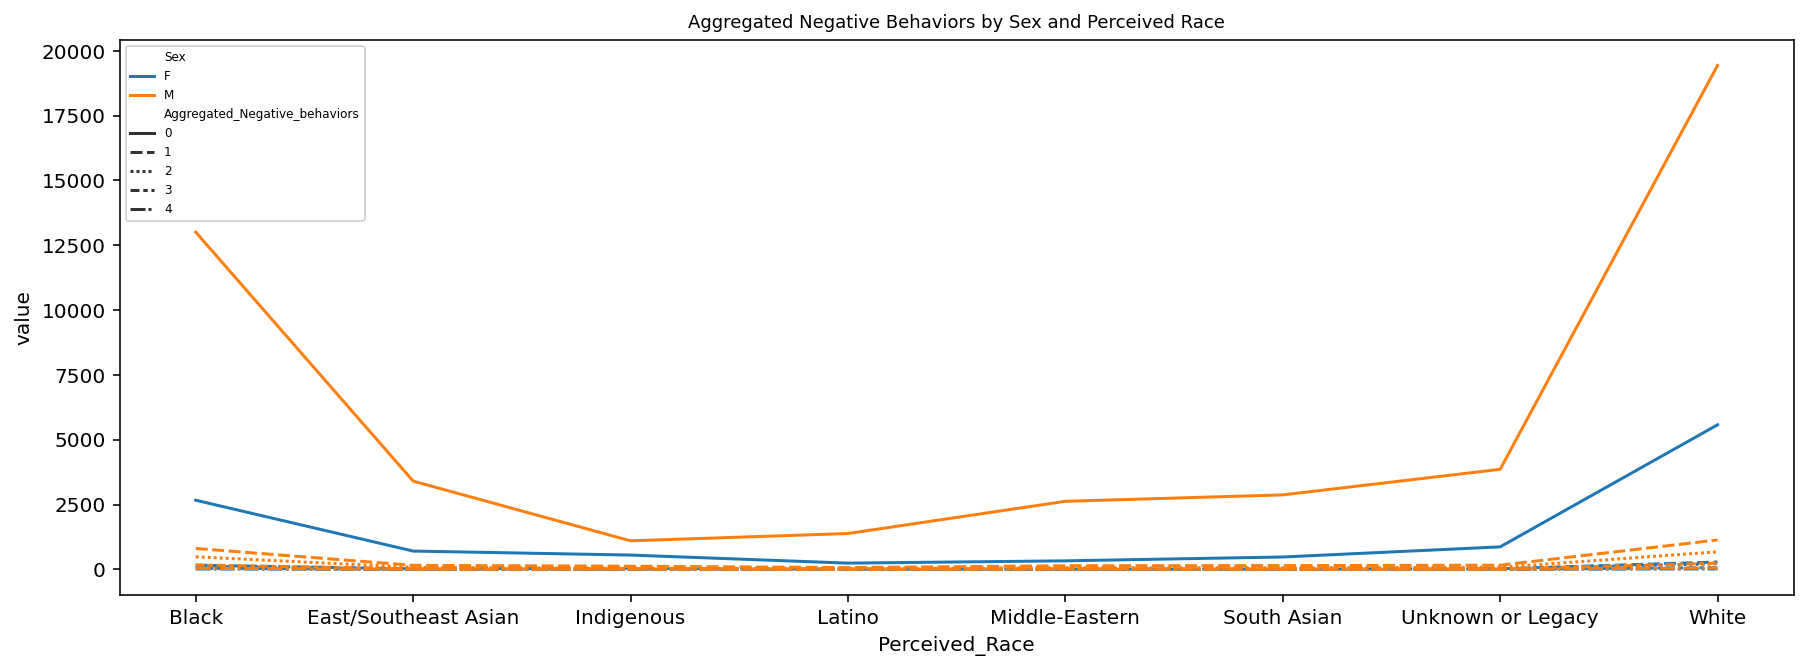

In [33]:
line_chart(Q1_table,'Perceived_Race','value','Sex','Aggregated Negative Behaviors by Sex and Perceived Race','Aggregated_Negative_behaviors',15)

In [34]:
ass_table['Aggregated_Negative_behaviors'].describe()

count    65267.000000
mean         0.153247
std          0.534204
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Aggregated_Negative_behaviors, dtype: float64

<Axes: xlabel='Aggregated_Negative_behaviors'>

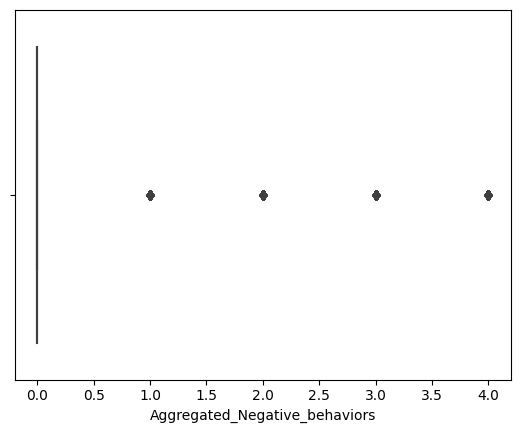

In [35]:
sns.boxplot(x=ass_table['Aggregated_Negative_behaviors'])

In [36]:
arrest_f_table = ass_table.loc[ass_table['Sex'] == "F"]
arrest_m_table = ass_table.loc[ass_table['Sex'] == "M"]
arrest_f_table['Aggregated_Negative_behaviors'].describe()

count    12617.000000
mean         0.160656
std          0.555236
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Aggregated_Negative_behaviors, dtype: float64

<Axes: xlabel='Aggregated_Negative_behaviors'>

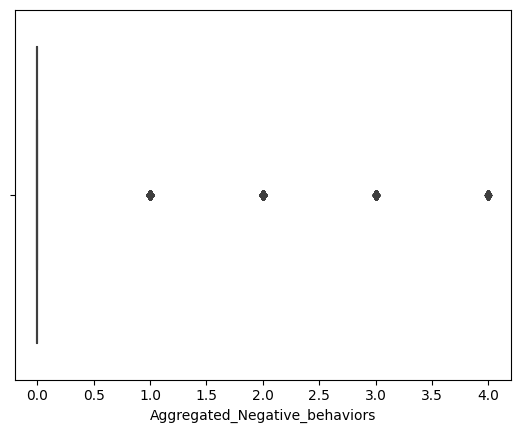

In [37]:
sns.boxplot(x=arrest_f_table['Aggregated_Negative_behaviors'])

In [38]:
arrest_m_table['Aggregated_Negative_behaviors'].describe()

count    52650.000000
mean         0.151472
std          0.529030
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Aggregated_Negative_behaviors, dtype: float64

In [39]:
t_test_arrest=ass_table[['Sex','Aggregated_Negative_behaviors']]
t_test_arrest.head()

,Sex,Aggregated_Negative_behaviors
0,M,0
1,M,0
2,M,0
3,M,0
4,M,0


In [40]:
arrest_group1 = t_test_arrest[t_test_arrest['Sex']=='F']
arrest_group2 = t_test_arrest[t_test_arrest['Sex']=='M']
ttest_ind(arrest_group1['Aggregated_Negative_behaviors'], arrest_group2['Aggregated_Negative_behaviors'])

Ttest_indResult(statistic=1.734501440982696, pvalue=0.0828338716833021)

In [41]:
ass_table['Aggregated_Search_Reasons'] = ass_table['SearchReason_CauseInjury']+ass_table['SearchReason_AssistEscape']+ass_table['SearchReason_PossessWeapons']+ass_table['SearchReason_PossessEvidence']

In [42]:
temp = ass_table[ass_table.StripSearch==1]
Q2_table = temp.groupby(['Sex','Perceived_Race','Aggregated_Search_Reasons']).size().unstack().reset_index(drop=False)
Q2_table=Q2_table.fillna(0)
Q2_table=Q2_table.drop(Q2_table[Q2_table['Sex']=='U'].index)
Q2_table=pd.melt(Q2_table,id_vars=['Sex','Perceived_Race'])
Q2_table.head()

,Sex,Perceived_Race,Aggregated_Search_Reasons,value
0,F,Black,0.0,28.0
1,F,East/Southeast Asian,0.0,0.0
2,F,Indigenous,0.0,13.0
3,F,Latino,0.0,1.0
4,F,Middle-Eastern,0.0,2.0


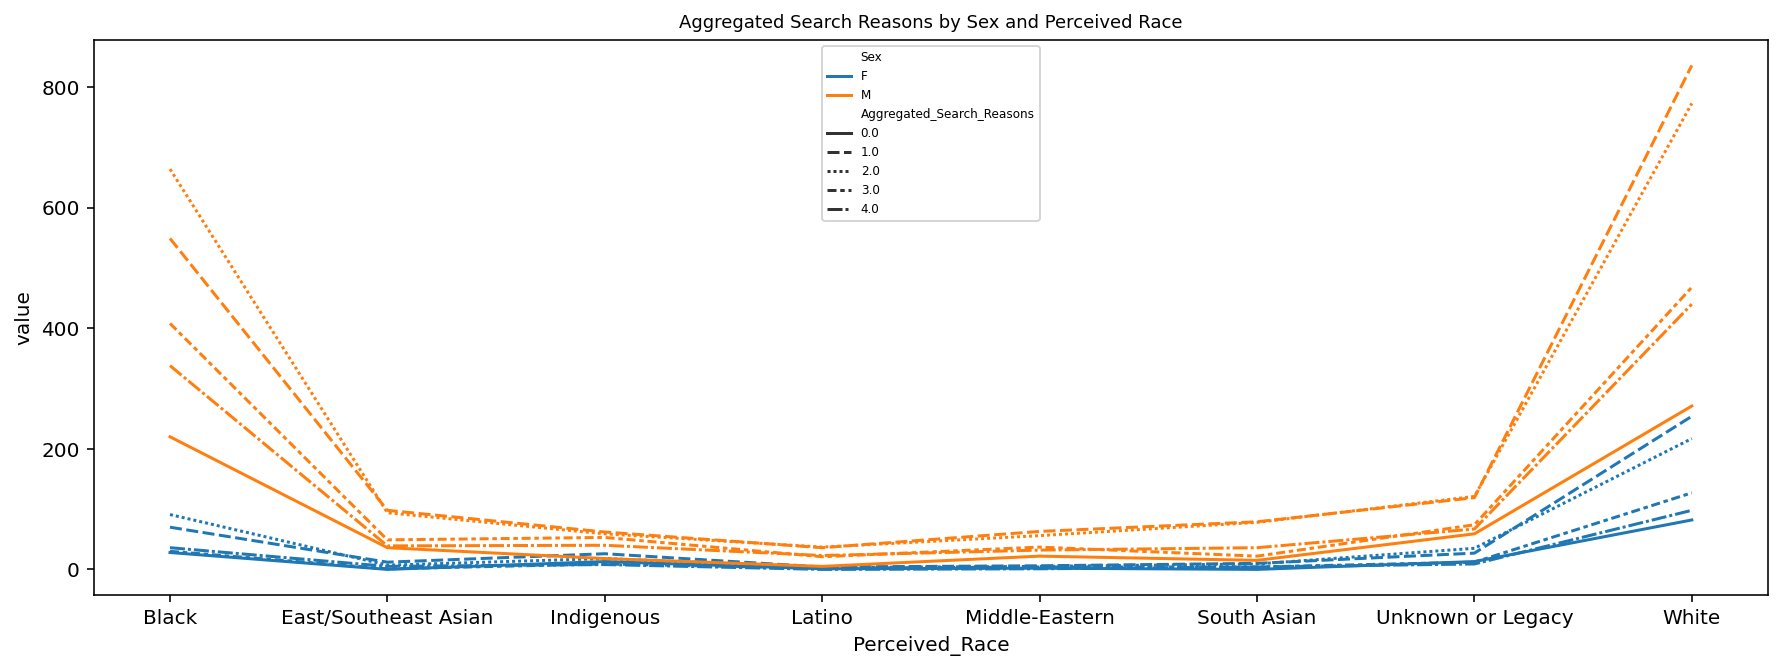

In [43]:
line_chart(Q2_table,'Perceived_Race','value','Sex','Aggregated Search Reasons by Sex and Perceived Race','Aggregated_Search_Reasons',15)

In [44]:
Strip_S_table=ass_table[ass_table.StripSearch==1]
Strip_S_table['Aggregated_Search_Reasons'].describe()

count    7801.000000
mean        1.981156
std         1.209695
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Aggregated_Search_Reasons, dtype: float64

In [45]:
Strip_S_table_F=Strip_S_table.loc[Strip_S_table['Sex'] == "F"]
Strip_S_table_F['Aggregated_Search_Reasons'].describe()

count    1283.000000
mean        1.862822
std         1.176292
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Aggregated_Search_Reasons, dtype: float64

<Axes: xlabel='Aggregated_Search_Reasons'>

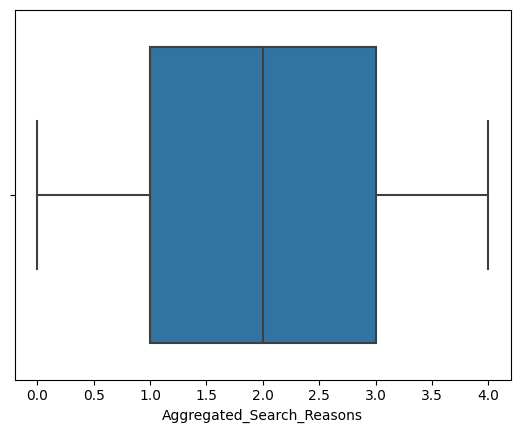

In [46]:
sns.boxplot(x=Strip_S_table_F['Aggregated_Search_Reasons'])

In [47]:
Strip_S_table_M=Strip_S_table.loc[Strip_S_table['Sex'] == "M"]
Strip_S_table_M['Aggregated_Search_Reasons'].describe()

count    6518.000000
mean        2.004449
std         1.214893
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Aggregated_Search_Reasons, dtype: float64

<Axes: xlabel='Aggregated_Search_Reasons'>

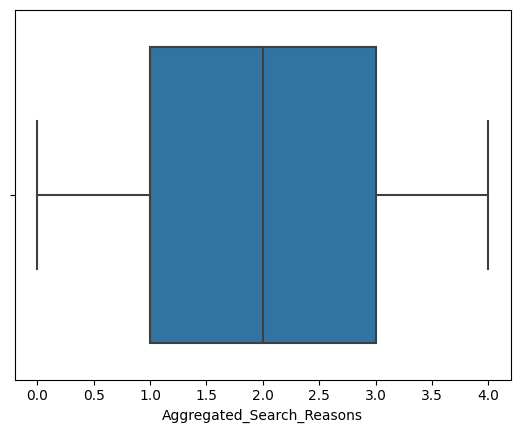

In [48]:
sns.boxplot(x=Strip_S_table_M['Aggregated_Search_Reasons'])

<Axes: xlabel='Aggregated_Search_Reasons', ylabel='Sex'>

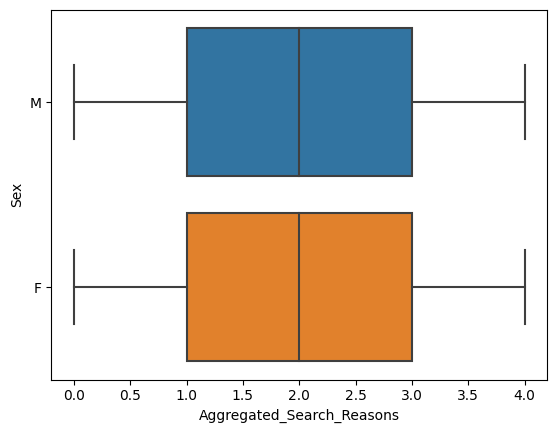

In [49]:
sns.boxplot(x=ass_table['Aggregated_Search_Reasons'],y=ass_table['Sex'])

<Axes: xlabel='Aggregated_Search_Reasons'>

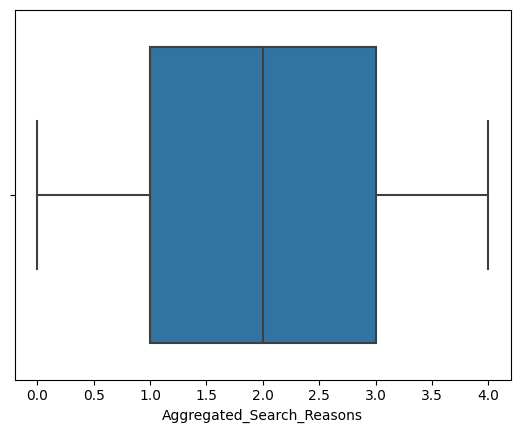

In [50]:
sns.boxplot(x=ass_table['Aggregated_Search_Reasons'])

In [51]:
t_test_sex_search=Strip_S_table[['Sex','Aggregated_Search_Reasons']]
t_test_sex_search.head()

,Sex,Aggregated_Search_Reasons
12,M,3.0
14,M,3.0
21,M,1.0
33,M,2.0
38,M,2.0


In [52]:
group1 = t_test_sex_search[t_test_sex_search['Sex']=='F']
group2 = t_test_sex_search[t_test_sex_search['Sex']=='M']
ttest_ind(group1['Aggregated_Search_Reasons'], group2['Aggregated_Search_Reasons'])

Ttest_indResult(statistic=-3.836623571021187, pvalue=0.00012572162046602353)

In [53]:
Strip_Search_Sex = ass_table.groupby(['Sex','Aggregated_Search_Reasons']).size().unstack().reset_index(drop=False)
Strip_Search_Sex=Strip_Search_Sex.fillna(0)
Strip_Search_Sex=Strip_Search_Sex.drop(Strip_Search_Sex[Strip_Search_Sex['Sex']=='U'].index)
Strip_Search_Sex

Aggregated_Search_Reasons,Sex,0.0,1.0,2.0,3.0,4.0
0,F,139,409,385,189,161
1,M,646,1842,1882,1133,1015


In [54]:
Strip_Search_F=Strip_Search_Sex.loc[Strip_Search_Sex['Sex'] == "F"]
Strip_Search_M=Strip_Search_Sex.loc[Strip_Search_Sex['Sex'] == "M"]
Strip_Search_F=np.array(Strip_Search_F.iloc[0])
Strip_Search_F=np.delete(Strip_Search_F,0)
Strip_Search_M=np.array(Strip_Search_M.iloc[0])
Strip_Search_M=np.delete(Strip_Search_M,0)

In [55]:
diffs=Strip_Search_M-Strip_Search_F
bound=0.5

In [56]:
T_avova1=ass_table[['Sex','Perceived_Race','Aggregated_Negative_behaviors']]
# Performing two-way ANOVA
model = ols('Aggregated_Negative_behaviors ~ C(Sex) + C(Perceived_Race) +\
C(Sex):C(Perceived_Race)',
            data=T_avova1).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                               df        sum_sq   mean_sq          F  \
C(Sex)                        1.0      0.859223  0.859223   3.019575   
C(Perceived_Race)             7.0     53.332993  7.618999  26.775522   
C(Sex):C(Perceived_Race)      7.0      4.840069  0.691438   2.429929   
Residual                  65247.0  18566.092977  0.284551        NaN   

                                PR(>F)  
C(Sex)                    8.226976e-02  
C(Perceived_Race)         5.959743e-37  
C(Sex):C(Perceived_Race)  1.734509e-02  
Residual                           NaN  


In [57]:
T_avova1['Perceived_Race'] = T_avova1['Perceived_Race'].apply(str)
tukey1 = pairwise_tukeyhsd(T_avova1['Aggregated_Negative_behaviors'],T_avova1['Perceived_Race'],alpha=0.05)
print(tukey1)

<ipython-input-57-f31d8647f4e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_avova1['Perceived_Race'] = T_avova1['Perceived_Race'].apply(str)


              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.0688    0.0 -0.0967  -0.041   True
               Black           Indigenous   0.0565 0.0003  0.0169  0.0962   True
               Black               Latino  -0.0495 0.0062 -0.0908 -0.0082   True
               Black       Middle-Eastern  -0.0331 0.0323 -0.0648 -0.0015   True
               Black          South Asian  -0.0661    0.0 -0.0963 -0.0359   True
               Black    Unknown or Legacy  -0.0735    0.0 -0.0999  -0.047   True
               Black                White  -0.0142 0.1282 -0.0302  0.0018  False
               Black                  nan  -0.1746 0.9993  -1.002  0.6529  False
East/Southeast Asian           Indigenous   0.1254    0.0  0.0802  0.1705   True
East/Southeast Asian        

In [58]:
levene_test_arr_perceived_race = levene(T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'White'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'Unknown or Legacy'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'Black'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'Middle-Eastern'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'Indigenous'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'South Asian'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'East/Southeast Asian'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'Latino']  
                     )
print(f"Levene's test: statistic={levene_test_arr_perceived_race.statistic:.3f}, p-value={levene_test_arr_perceived_race.pvalue:.3f}")

Levene's test: statistic=27.056, p-value=0.000


In [59]:
levene_test_arr_sex = levene(T_avova1['Aggregated_Negative_behaviors'][T_avova1['Sex'] == 'F'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Sex'] == 'M'])
print(f"Levene's test: statistic={levene_test_arr_sex.statistic:.3f}, p-value={levene_test_arr_sex.pvalue:.3f}")

Levene's test: statistic=3.008, p-value=0.083


In [60]:
group11=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'Latino')]['Aggregated_Negative_behaviors']
group12=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'East/Southeast Asian')]['Aggregated_Negative_behaviors']
group13=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'South Asian')]['Aggregated_Negative_behaviors']
group14=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'Indigenous')]['Aggregated_Negative_behaviors']
group15=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'Black')]['Aggregated_Negative_behaviors']
group16=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'Unknown or Legacy')]['Aggregated_Negative_behaviors']
group17=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'Middle-Eastern')]['Aggregated_Negative_behaviors']
group21=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'Latino')]['Aggregated_Negative_behaviors']
group22=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'East/Southeast Asian')]['Aggregated_Negative_behaviors']
group23=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'South Asian')]['Aggregated_Negative_behaviors']
group24=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'Indigenous')]['Aggregated_Negative_behaviors']
group25=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'Black')]['Aggregated_Negative_behaviors']
group26=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'Unknown or Legacy')]['Aggregated_Negative_behaviors']
group27=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'Middle-Eastern')]['Aggregated_Negative_behaviors']

shapiro_results11 = stats.shapiro(group11)
shapiro_results12 = stats.shapiro(group12)
shapiro_results13 = stats.shapiro(group13)
shapiro_results14 = stats.shapiro(group14)
shapiro_results15 = stats.shapiro(group15)
shapiro_results16 = stats.shapiro(group16)
shapiro_results17 = stats.shapiro(group17)

shapiro_results21 = stats.shapiro(group21)
shapiro_results22 = stats.shapiro(group22)
shapiro_results23 = stats.shapiro(group23)
shapiro_results24 = stats.shapiro(group24)
shapiro_results25 = stats.shapiro(group25)
shapiro_results26 = stats.shapiro(group26)
shapiro_results27 = stats.shapiro(group27)

# Check normality assumption
alpha = 0.05
if all(p > alpha for p in [shapiro_results11[1], shapiro_results12[1],shapiro_results13[1], shapiro_results14[1],shapiro_results15[1], shapiro_results16[1],shapiro_results17[1],
                           shapiro_results21[1], shapiro_results22[1],shapiro_results23[1], shapiro_results24[1],shapiro_results25[1], shapiro_results26[1],shapiro_results27[1]]):
    print("Assumption of normality is met.")
else:
    print("Assumption of normality is violated.")

Assumption of normality is violated.


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [61]:
T_avova2=Strip_S_table[['Sex','Perceived_Race','Aggregated_Search_Reasons']]
# Performing two-way ANOVA
model = ols('Aggregated_Search_Reasons ~ C(Sex) + C(Perceived_Race) +\
C(Sex):C(Perceived_Race)',
            data=T_avova2).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                              df        sum_sq    mean_sq          F    PR(>F)
C(Sex)                       1.0     21.455509  21.455509  14.699189  0.000127
C(Perceived_Race)            7.0     16.448488   2.349784   1.609839  0.127497
C(Sex):C(Perceived_Race)     7.0     13.457549   1.922507   1.317111  0.237430
Residual                  7784.0  11361.830249   1.459639        NaN       NaN


In [62]:
tukey2 = pairwise_tukeyhsd(Strip_S_table['Aggregated_Search_Reasons'],Strip_S_table['Sex'],alpha=0.05)
print(tukey2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper reject
-------------------------------------------------
     F      M   0.1416 0.0001 0.0693 0.214   True
-------------------------------------------------


In [63]:
levene_test_ser_sex = levene(Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Sex'] == 'F'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Sex'] == 'M'])
print(f"Levene's test: statistic={levene_test_ser_sex.statistic:.3f}, p-value={levene_test_ser_sex.pvalue:.3f}")

Levene's test: statistic=2.075, p-value=0.150


In [64]:
levene_test_ser_perceived_race = levene(Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'White'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'Unknown or Legacy'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'Black'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'Middle-Eastern'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'Indigenous'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'South Asian'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'East/Southeast Asian'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'Latino']  
                     )
print(f"Levene's test: statistic={levene_test_ser_perceived_race.statistic:.3f}, p-value={levene_test_ser_perceived_race.pvalue:.3f}")

Levene's test: statistic=1.165, p-value=0.319


In [65]:
SW_table=Strip_S_table[['Sex','Perceived_Race','Aggregated_Search_Reasons']].reset_index()

group11=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'Latino')]['Aggregated_Search_Reasons']
group12=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'East/Southeast Asian')]['Aggregated_Search_Reasons']
group13=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'South Asian')]['Aggregated_Search_Reasons']
group14=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'Indigenous')]['Aggregated_Search_Reasons']
group15=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'Black')]['Aggregated_Search_Reasons']
group16=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'Unknown or Legacy')]['Aggregated_Search_Reasons']
group17=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'Middle-Eastern')]['Aggregated_Search_Reasons']
group21=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'Latino')]['Aggregated_Search_Reasons']
group22=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'East/Southeast Asian')]['Aggregated_Search_Reasons']
group23=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'South Asian')]['Aggregated_Search_Reasons']
group24=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'Indigenous')]['Aggregated_Search_Reasons']
group25=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'Black')]['Aggregated_Search_Reasons']
group26=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'Unknown or Legacy')]['Aggregated_Search_Reasons']
group27=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'Middle-Eastern')]['Aggregated_Search_Reasons']

shapiro_results11 = stats.shapiro(group11)
shapiro_results12 = stats.shapiro(group12)
shapiro_results13 = stats.shapiro(group13)
shapiro_results14 = stats.shapiro(group14)
shapiro_results15 = stats.shapiro(group15)
shapiro_results16 = stats.shapiro(group16)
shapiro_results17 = stats.shapiro(group17)

shapiro_results21 = stats.shapiro(group21)
shapiro_results22 = stats.shapiro(group22)
shapiro_results23 = stats.shapiro(group23)
shapiro_results24 = stats.shapiro(group24)
shapiro_results25 = stats.shapiro(group25)
shapiro_results26 = stats.shapiro(group26)
shapiro_results27 = stats.shapiro(group27)

# Check normality assumption
alpha = 0.05
if all(p > alpha for p in [shapiro_results11[1], shapiro_results12[1],shapiro_results13[1], shapiro_results14[1],shapiro_results15[1], shapiro_results16[1],shapiro_results17[1],
                           shapiro_results21[1], shapiro_results22[1],shapiro_results23[1], shapiro_results24[1],shapiro_results25[1], shapiro_results26[1],shapiro_results27[1]]):
    print("Assumption of normality is met.")
else:
    print("Assumption of normality is violated.")


Assumption of normality is violated.


# Final_Project


In [66]:
age_counts = ass_table['Age_group__at_arrest_'].value_counts()

In [67]:
age_counts

Aged 25 to 34 years          20945
Aged 35 to 44 years          16241
Aged 18 to 24 years          10039
Aged 45 to 54 years           9066
Aged 55 to 64 years           4588
Aged 17 years and younger     3042
Aged 65 and older             1322
Name: Age_group__at_arrest_, dtype: int64

In [68]:
age_group_counts = ass_table.groupby('Age_group__at_arrest_').size().reset_index(name='Number_of_People')

In [69]:
age_group_counts

,Age_group__at_arrest_,Number_of_People
0,Aged 17 years and younger,3042
1,Aged 18 to 24 years,10039
2,Aged 25 to 34 years,20945
3,Aged 35 to 44 years,16241
4,Aged 45 to 54 years,9066
5,Aged 55 to 64 years,4588
6,Aged 65 and older,1322


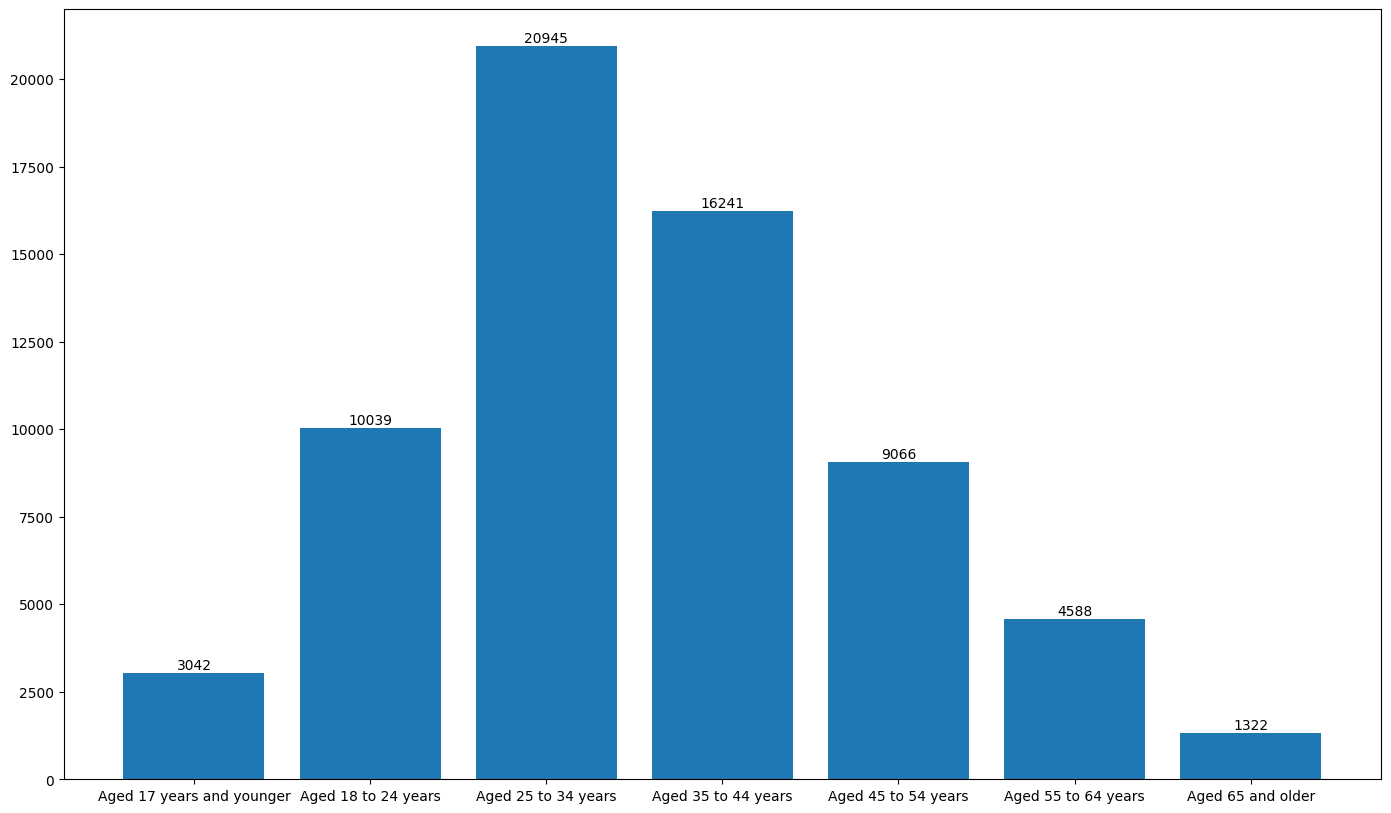

In [70]:
fig, ax = plt.subplots(figsize=(17,10))
n, bins, patches = ax.hist(age_group_counts['Age_group__at_arrest_'], bins=range(len(age_group_counts)+1), align='left', rwidth=0.8,
                           weights=age_group_counts['Number_of_People'])
for i in range(len(patches)):
    ax.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 10,
            int(n[i]), ha='center', va='bottom')
plt.show()

In [71]:
booked_counts = ass_table.groupby('Booked').size().reset_index(name='Number_of_People')
booked_counts.loc[1,'Number_of_People']=booked_counts.loc[1,'Number_of_People']+booked_counts.loc[2,'Number_of_People']
booked_counts=booked_counts.drop(2)
booked_counts

,Booked,Number_of_People
0,0,30786
1,1,34481


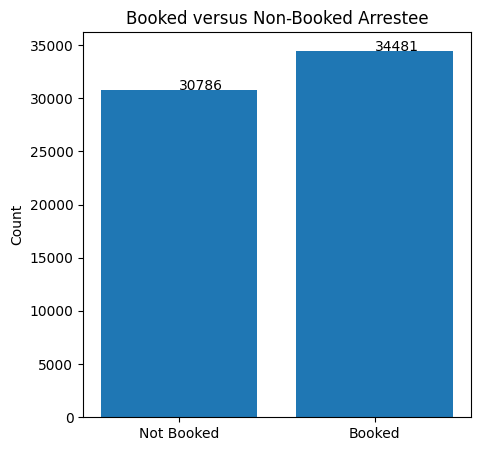

In [72]:
# draw a bar graph of the dataframe
plt.figure(figsize=(5,5))
plt.bar(["Not Booked","Booked"],booked_counts['Number_of_People'])
#booked_counts.plot(kind='bar')
plt.title('Booked versus Non-Booked Arrestee')
plt.ylabel('Count')

# display the number of people on the bar
for i, v in enumerate(booked_counts['Number_of_People']):
    plt.text(booked_counts['Booked'][i], v, str(v))

plt.show()

In [73]:
booked_counts

,Booked,Number_of_People
0,0,30786
1,1,34481


In [74]:
booked_counts_average=booked_counts.loc[1,'Number_of_People']/(booked_counts.loc[0,'Number_of_People']+booked_counts.loc[1,'Number_of_People'])
print("The percentage is: %.2f%%" % booked_counts_average)

The percentage is: 0.53%


In [75]:
booked_counts_average

0.5283068012931497

In [76]:
temp = ass_table[ass_table.StripSearch==1]
Q2_table = temp.groupby(['Sex','Age_group__at_arrest_','Aggregated_Search_Reasons']).size().unstack().reset_index(drop=False)
Q2_table=Q2_table.fillna(0)
Q2_table=Q2_table.drop(Q2_table[Q2_table['Sex']=='U'].index)
Q2_table=pd.melt(Q2_table,id_vars=['Sex','Age_group__at_arrest_'])
Q2_table=Q2_table.rename(columns={'value':'Count'})
Q2_table

,Sex,Age_group__at_arrest_,Aggregated_Search_Reasons,Count
0,F,Aged 17 years and younger,0.0,4.0
1,F,Aged 18 to 24 years,0.0,23.0
2,F,Aged 25 to 34 years,0.0,59.0
3,F,Aged 35 to 44 years,0.0,32.0
4,F,Aged 45 to 54 years,0.0,20.0
...,...,...,...,...
65,M,Aged 25 to 34 years,4.0,342.0
66,M,Aged 35 to 44 years,4.0,244.0
67,M,Aged 45 to 54 years,4.0,106.0
68,M,Aged 55 to 64 years,4.0,47.0


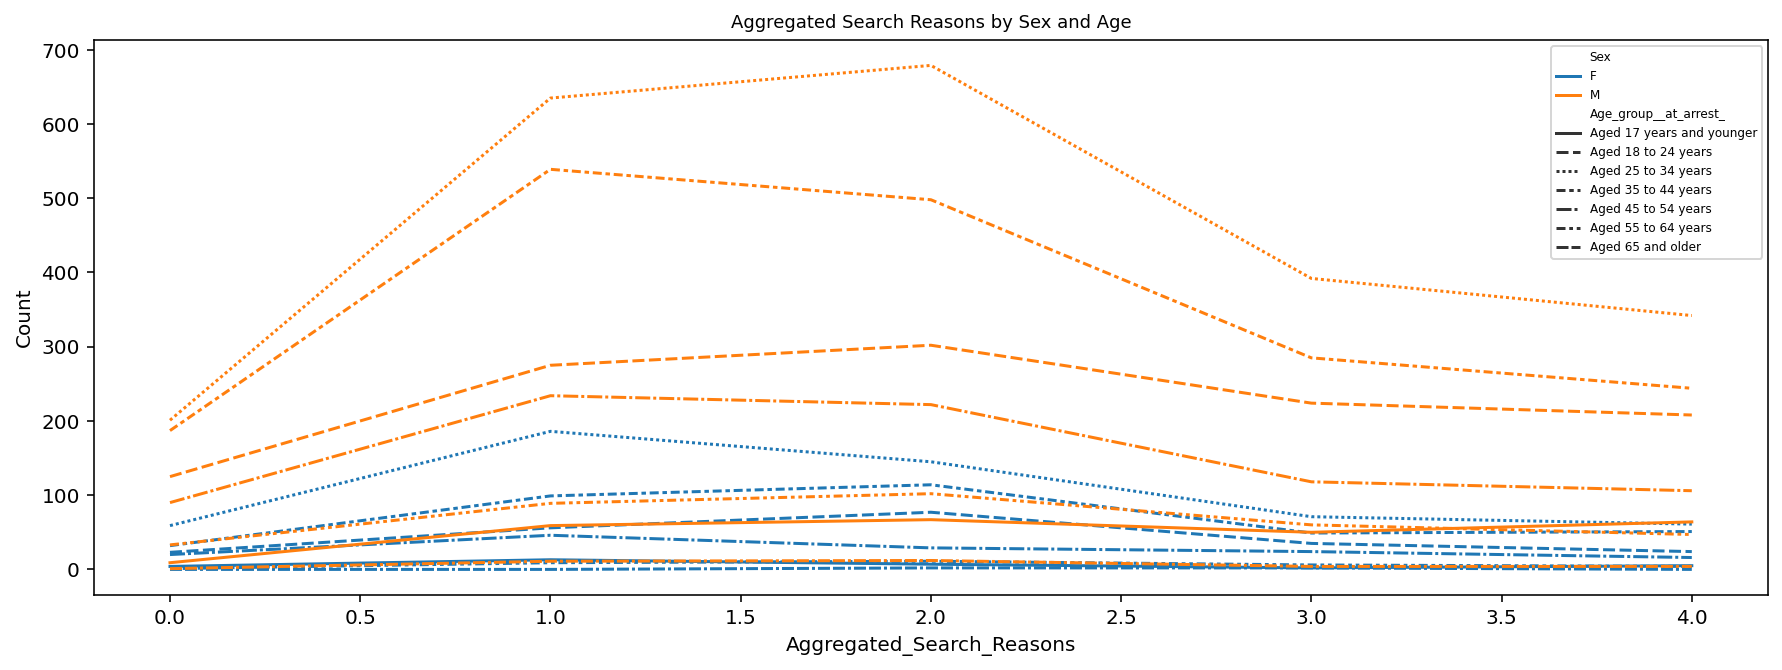

In [77]:
line_chart(Q2_table,'Aggregated_Search_Reasons','Count','Sex','Aggregated Search Reasons by Sex and Age','Age_group__at_arrest_',15)

In [78]:
ass_table['Booked'] = ass_table['Booked'].apply(lambda x: 1 if x != 0 else 0)

In [79]:
book_table =ass_table.groupby(['Age_group__at_arrest_','Booked']).size().unstack().reset_index(drop=False)
#book_table['Total'] = book_table['0'] + book_table['1']
book_table=g_book_table()
book_table

,Index,Age_group__at_arrest_,Booked,Pr(success)
0,0,Aged 17 years and younger,1252,0.411571
1,1,Aged 18 to 24 years,5327,0.530631
2,2,Aged 25 to 34 years,11685,0.557890
3,3,Aged 35 to 44 years,8879,0.546703
4,4,Aged 45 to 54 years,4701,0.518531
5,5,Aged 55 to 64 years,2135,0.465344
6,6,Aged 65 and older,496,0.375189


<function matplotlib.pyplot.show(close=None, block=None)>

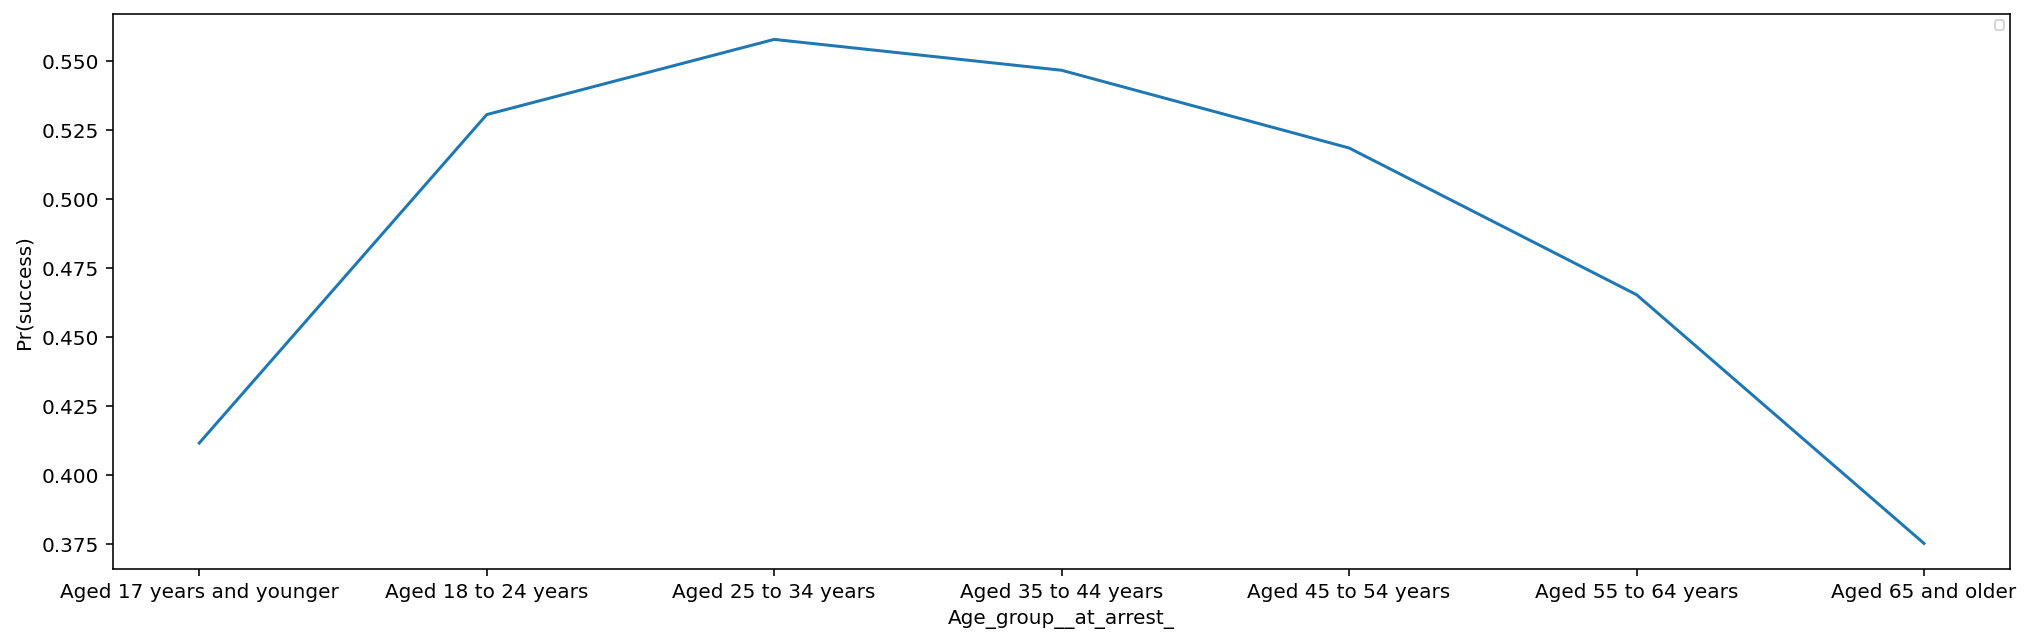

In [80]:
plt.figure(figsize=(17,5),dpi=144)
p=sns.lineplot(data=book_table,x='Age_group__at_arrest_',y='Pr(success)')
p.legend(fontsize=6)
plt.show

In [81]:
ass_table.fillna(0, inplace=True)
search_reasons_table = ass_table
search_reasons_table.fillna(0, inplace=True)
search_reasons_table['Total_Search_Reasons'] = search_reasons_table['SearchReason_CauseInjury'] + search_reasons_table['SearchReason_AssistEscape']+ search_reasons_table['SearchReason_PossessWeapons']+ search_reasons_table['SearchReason_PossessEvidence']
ass_table['Total_Search_Reasons'] = search_reasons_table['SearchReason_CauseInjury'] + search_reasons_table['SearchReason_AssistEscape']+ search_reasons_table['SearchReason_PossessWeapons']+ search_reasons_table['SearchReason_PossessEvidence']
search_reasons_table = search_reasons_table[search_reasons_table['Total_Search_Reasons'] != 0]


In [82]:
Search_age_table =search_reasons_table.groupby(['Age_group__at_arrest_','Total_Search_Reasons']).size().unstack().reset_index(drop=False)
Search_age_table

Total_Search_Reasons,Age_group__at_arrest_,1.0,2.0,3.0,4.0
0,Aged 17 years and younger,72,74,52,69
1,Aged 18 to 24 years,331,379,259,232
2,Aged 25 to 34 years,821,824,463,403
3,Aged 35 to 44 years,638,612,334,295
4,Aged 45 to 54 years,280,251,142,122
5,Aged 55 to 64 years,98,113,66,51
6,Aged 65 and older,11,14,6,4


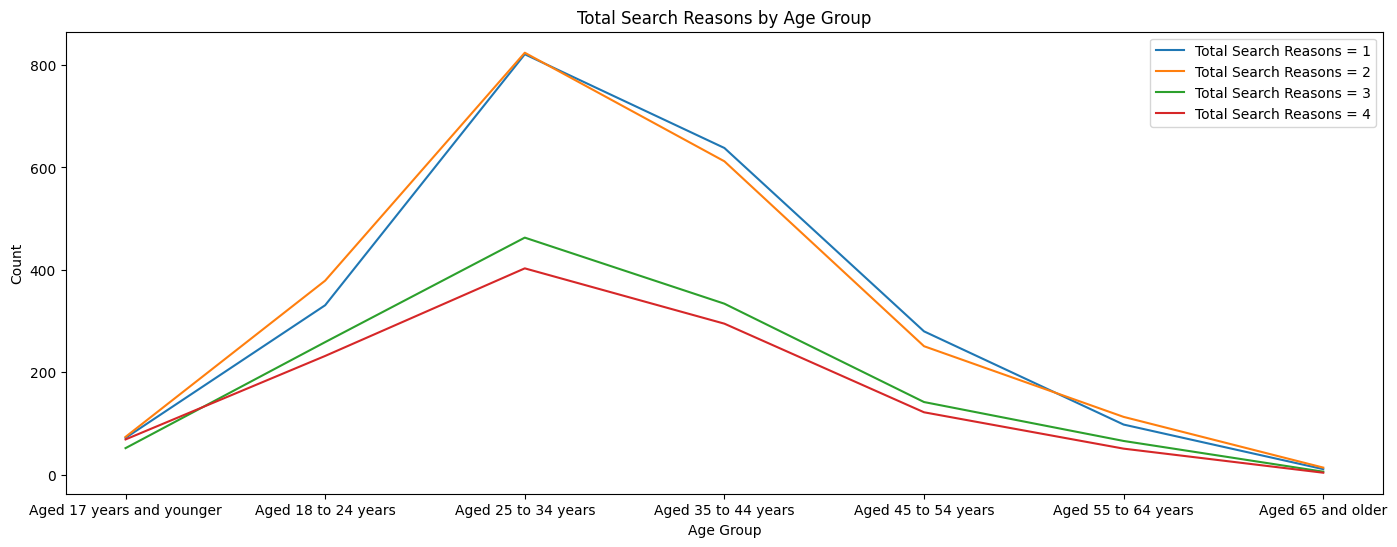

In [83]:
age_group = Search_age_table['Age_group__at_arrest_']
success_1 = Search_age_table[1.0]
success_2 = Search_age_table[2.0]
success_3 = Search_age_table[3.0]
success_4 = Search_age_table[4.0]

fig, ax = plt.subplots(figsize=(17, 6))
ax.plot(age_group, success_1, label='Total Search Reasons = 1')
ax.plot(age_group, success_2, label='Total Search Reasons = 2')
ax.plot(age_group, success_3, label='Total Search Reasons = 3')
ax.plot(age_group, success_4, label='Total Search Reasons = 4')

ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Total Search Reasons by Age Group')


ax.legend()


plt.show()

In [84]:
Search_age_table = Search_age_table.rename(columns={1.0: 'count=1', 2.0: 'count=2', 3.0: 'count=3',4.0: 'count=4'})
Search_age_table

Total_Search_Reasons,Age_group__at_arrest_,count=1,count=2,count=3,count=4
0,Aged 17 years and younger,72,74,52,69
1,Aged 18 to 24 years,331,379,259,232
2,Aged 25 to 34 years,821,824,463,403
3,Aged 35 to 44 years,638,612,334,295
4,Aged 45 to 54 years,280,251,142,122
5,Aged 55 to 64 years,98,113,66,51
6,Aged 65 and older,11,14,6,4


In [85]:
Search_age_table

Total_Search_Reasons,Age_group__at_arrest_,count=1,count=2,count=3,count=4
0,Aged 17 years and younger,72,74,52,69
1,Aged 18 to 24 years,331,379,259,232
2,Aged 25 to 34 years,821,824,463,403
3,Aged 35 to 44 years,638,612,334,295
4,Aged 45 to 54 years,280,251,142,122
5,Aged 55 to 64 years,98,113,66,51
6,Aged 65 and older,11,14,6,4


In [86]:
new_s_a_t = Search_age_table.melt(id_vars='Age_group__at_arrest_', value_vars=['count=1', 'count=2', 'count=3', 'count=4'], var_name='Reasons', value_name='Count_Number')

In [87]:
new_s_a_t.head()

,Age_group__at_arrest_,Reasons,Count_Number
0,Aged 17 years and younger,count=1,72
1,Aged 18 to 24 years,count=1,331
2,Aged 25 to 34 years,count=1,821
3,Aged 35 to 44 years,count=1,638
4,Aged 45 to 54 years,count=1,280


<function matplotlib.pyplot.show(close=None, block=None)>

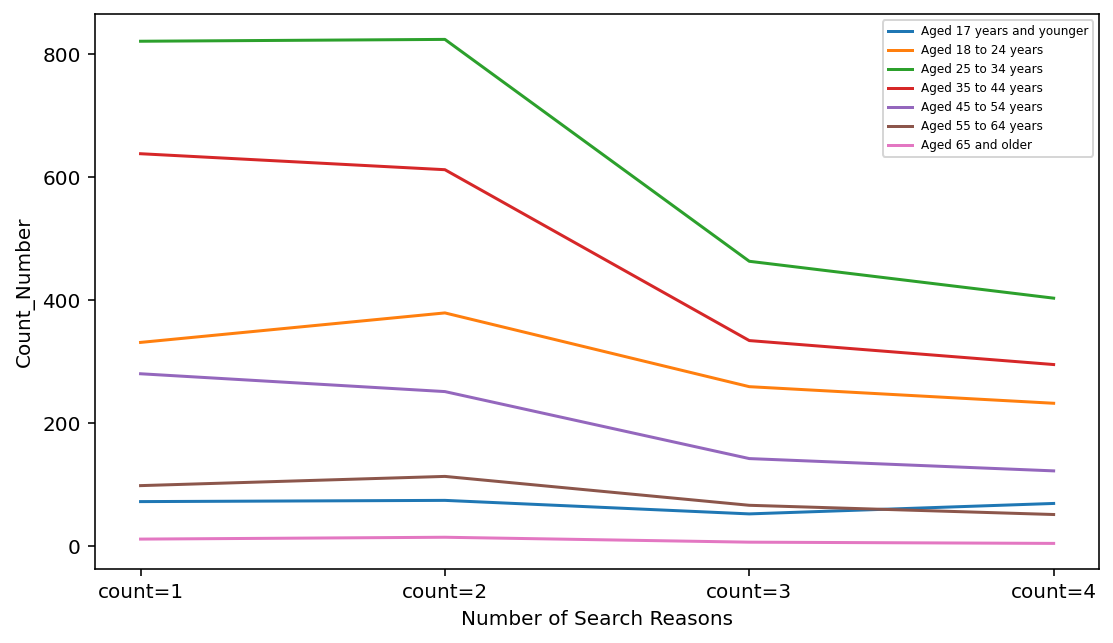

In [88]:
plt.figure(figsize=(9,5),dpi=144)
p=sns.lineplot(data=new_s_a_t,x="Reasons",y="Count_Number",hue="Age_group__at_arrest_")
p.legend(fontsize=6)
plt.xlabel('Number of Search Reasons')
plt.show
  

In [89]:
item_counts = ass_table.groupby('ItemsFound').size().reset_index(name='Number_of_People')
item_table=ass_table
item_table = item_table[item_table['Total_Search_Reasons'] != 0]
item_table

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Aggregated_Negative_behaviors,Aggregated_Search_Reasons,Total_Search_Reasons
12,2021,Apr-June,1039002,6030241.0,330778,Black,M,Aged 25 to 34 years,Not a youth,53,...,1,1.0,1.0,1.0,0.0,0.0,13,0,3.0,3.0
14,2020,Apr-June,1045382,6057058.0,312724,Black,M,Aged 25 to 34 years,Not a youth,53,...,0,1.0,1.0,1.0,0.0,0.0,15,0,3.0,3.0
21,2020,Apr-June,1041209,0.0,312724,Unknown or Legacy,M,Aged 25 to 34 years,Not a youth,XX,...,0,1.0,0.0,0.0,0.0,0.0,22,0,1.0,1.0
33,2021,Jan-Mar,1026070,6064426.0,323427,White,M,Aged 35 to 44 years,Not a youth,53,...,1,0.0,0.0,1.0,1.0,0.0,34,0,2.0,2.0
38,2020,Apr-June,1028958,6057012.0,319209,Latino,M,Aged 18 to 24 years,Not a youth,XX,...,1,1.0,0.0,1.0,0.0,0.0,39,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63902,2021,July-Sept,1037840,6004843.0,332217,South Asian,M,Aged 35 to 44 years,Not a youth,XX,...,1,0.0,0.0,0.0,1.0,1.0,63903,0,1.0,1.0
63915,2021,July-Sept,1055146,6021401.0,318526,Black,M,Aged 25 to 34 years,Not a youth,14,...,1,1.0,0.0,0.0,1.0,0.0,63916,0,2.0,2.0
64235,2021,July-Sept,1059621,6007012.0,315379,South Asian,M,Aged 25 to 34 years,Not a youth,23,...,1,0.0,0.0,0.0,1.0,0.0,64236,0,1.0,1.0
64347,2021,Oct-Dec,1041289,6031529.0,301846,Black,M,Aged 17 years and younger,Youth (aged 17 years and under),23,...,0,0.0,0.0,1.0,1.0,1.0,64348,0,2.0,2.0


In [90]:
item_counts = item_table.groupby('ItemsFound').size().reset_index(name='Number_of_People')
item_counts

,ItemsFound,Number_of_People
0,0.0,4425
1,1.0,2591


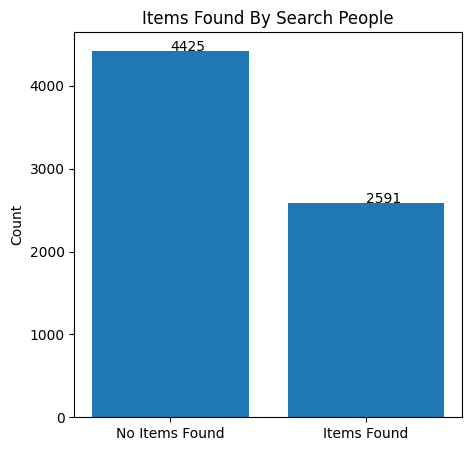

In [91]:
# draw a bar graph of the dataframe
plt.figure(figsize=(5,5))
plt.bar(["No Items Found","Items Found"],item_counts['Number_of_People'])

plt.title('Items Found By Search People')
plt.ylabel('Count')

# display the number of people on the bar
for i, v in enumerate(item_counts['Number_of_People']):
    plt.text(item_counts['ItemsFound'][i], v, str(v))

plt.show()

In [92]:

ass_table['Total_Negative_Behavior'] = ass_table['Actions_at_arrest___Concealed_i'] + ass_table['Actions_at_arrest___Combative__']+ ass_table['Actions_at_arrest___Resisted__d']+ass_table['Actions_at_arrest___Mental_inst']+ ass_table['Actions_at_arrest___Assaulted_o']
s_a_table=ass_table
s_a_table = s_a_table[s_a_table['Total_Search_Reasons'] != 0]

s_a_table['Total_Search_Reasons'].describe()

count    7016.000000
mean        2.202822
std         1.067126
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Total_Search_Reasons, dtype: float64

<Axes: xlabel='Total_Search_Reasons'>

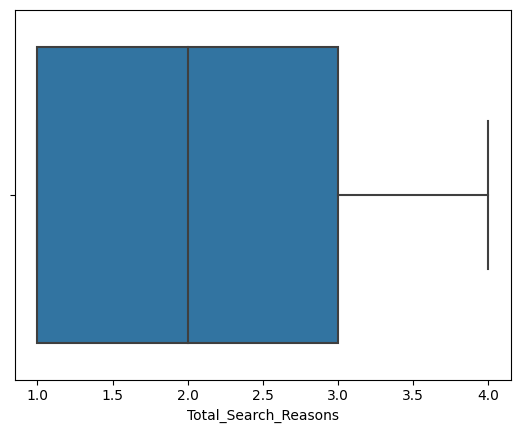

In [93]:
sns.boxplot(x=s_a_table['Total_Search_Reasons'])

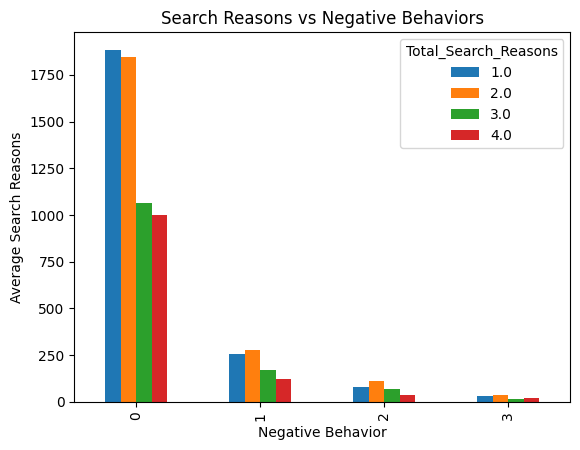

In [94]:
grouped_data = s_a_table.groupby(['Total_Negative_Behavior', 'Total_Search_Reasons']).size().reset_index(name='counts')

pivoted_data = grouped_data.pivot(index='Total_Negative_Behavior', columns='Total_Search_Reasons', values='counts')
pivoted_data.plot(kind='bar')

plt.title("Search Reasons vs Negative Behaviors")
plt.xlabel("Negative Behavior")
plt.ylabel("Average Search Reasons")

plt.show()


In [95]:
s_a_table=s_a_table.loc[:,['Total_Negative_Behavior', 'Total_Search_Reasons']]
s_a_table

,Total_Negative_Behavior,Total_Search_Reasons
12,0,3.0
14,0,3.0
21,0,1.0
33,0,2.0
38,0,2.0
...,...,...
63902,0,1.0
63915,0,2.0
64235,0,1.0
64347,0,2.0


In [96]:
s_count_table=s_a_table.groupby(['Total_Negative_Behavior','Total_Search_Reasons']).size().reset_index(name='counts')
s_count_table

,Total_Negative_Behavior,Total_Search_Reasons,counts
0,0,1.0,1884
1,0,2.0,1844
2,0,3.0,1065
3,0,4.0,1001
4,1,1.0,255
5,1,2.0,278
6,1,3.0,169
7,1,4.0,120
8,2,1.0,80
9,2,2.0,111


In [97]:
grouped = s_count_table.groupby('Total_Negative_Behavior')
avg_counts = grouped['counts'].sum() / grouped.size()
result = pd.DataFrame({'Average': avg_counts, 'Total_Negative_Behavior': avg_counts.index})
result

,Average,Total_Negative_Behavior
Total_Negative_Behavior,,
0,1448.50,0
1,205.50,1
2,74.75,2
3,25.25,3


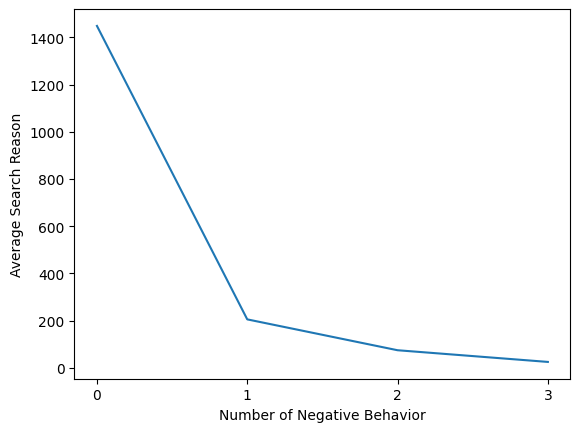

In [98]:
plt.plot(result["Total_Negative_Behavior"], result["Average"])
plt.xticks(range(0, 4))
plt.xlabel('Number of Negative Behavior')
plt.ylabel('Average Search Reason')
plt.show()

In [99]:
counts_sum = s_count_table.groupby('Total_Negative_Behavior')['counts'].sum()
weighted_avg = s_count_table.groupby('Total_Negative_Behavior').apply(lambda x: (x['Total_Search_Reasons']*x['counts']).sum() / x['counts'].sum())
new_result = pd.DataFrame({'Total_Negative_Behavior': weighted_avg.index, 'Weighted_Average': weighted_avg.values, 'Counts_Sum': counts_sum})
new_result


,Total_Negative_Behavior,Weighted_Average,Counts_Sum
Total_Negative_Behavior,,,
0,0,2.204177,5794
1,1,2.187348,822
2,2,2.217391,299
3,3,2.207921,101


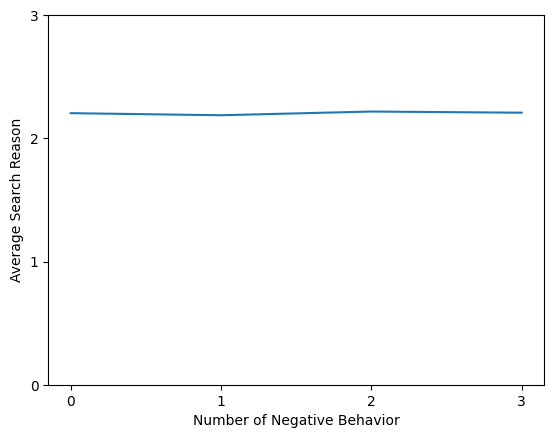

In [100]:
plt.plot(new_result["Total_Negative_Behavior"],new_result["Weighted_Average"])
plt.xticks(range(0, 4))
plt.yticks(range(0, 4))
plt.xlabel('Number of Negative Behavior')
plt.ylabel('Average Search Reason')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

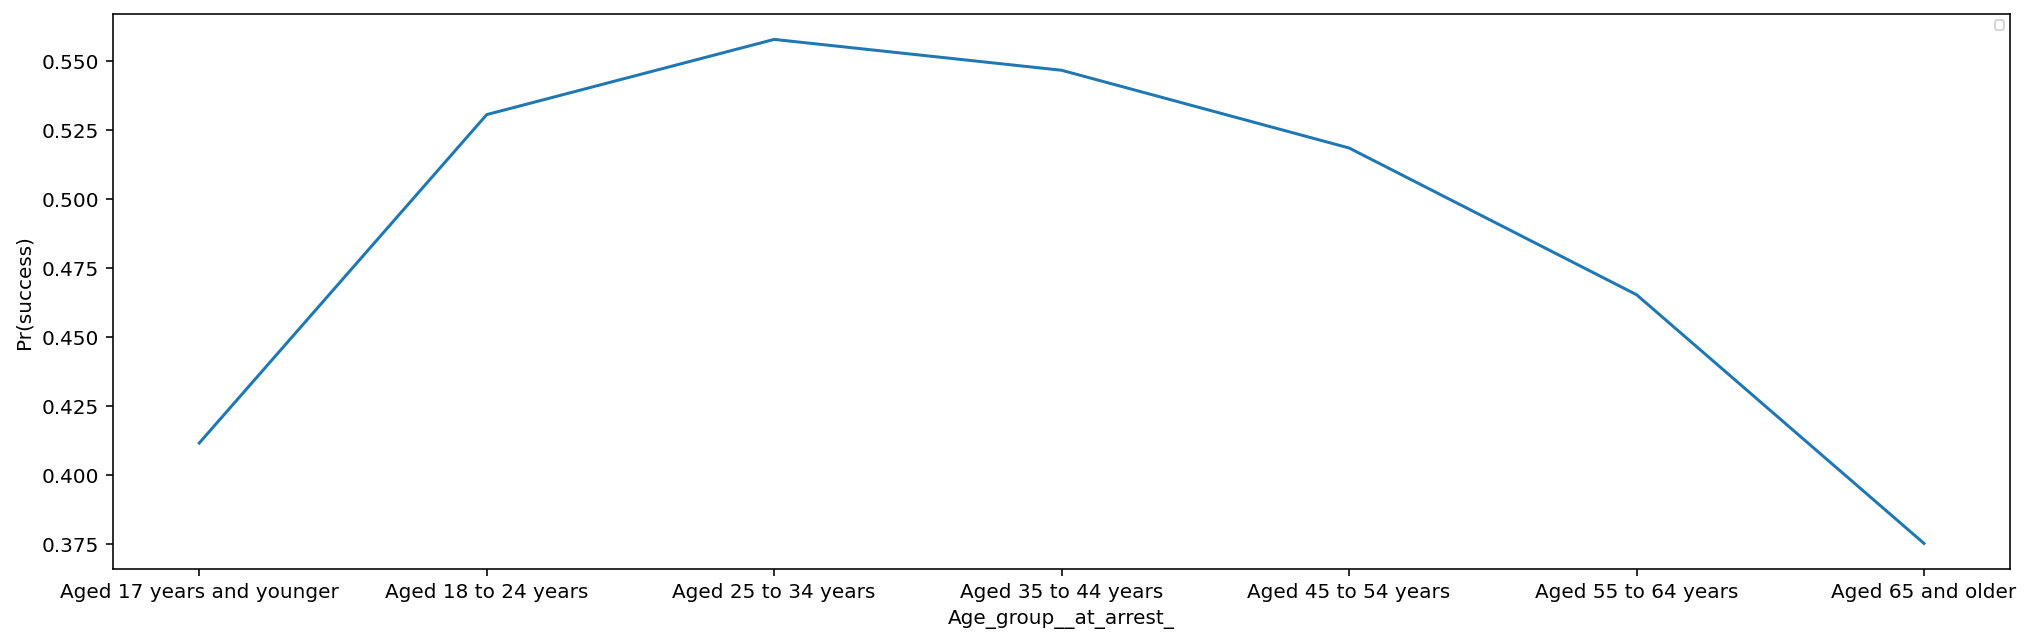

In [101]:
book_table =ass_table.groupby(['Age_group__at_arrest_','Booked']).size().unstack().reset_index(drop=False)
#book_table['Total'] = book_table['0'] + book_table['1']
book_table=g_book_table()
book_table
plt.figure(figsize=(17,5),dpi=144)
p=sns.lineplot(data=book_table,x='Age_group__at_arrest_',y='Pr(success)')
p.legend(fontsize=6)
plt.show

In [102]:
item_table =ass_table.groupby(['Total_Search_Reasons','ItemsFound']).size().unstack().reset_index(drop=False)
item_table

ItemsFound,Total_Search_Reasons,0.0,1.0
0,0.0,57931,320
1,1.0,1527,724
2,2.0,1384,883
3,3.0,778,544
4,4.0,736,440


<function matplotlib.pyplot.show(close=None, block=None)>

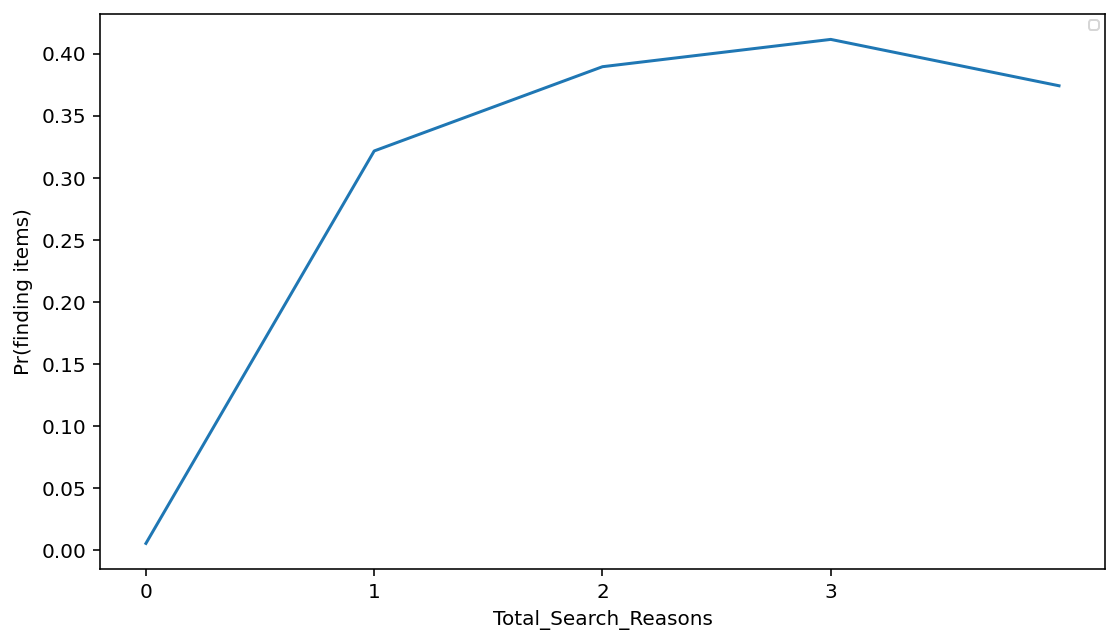

In [103]:
item_table["Pr(finding items)"] = item_table[1.0] /(item_table[1.0]+item_table[0.0])

plt.figure(figsize=(9,5),dpi=144)
plt.xticks(range(0, 4))
p=sns.lineplot(data=item_table,x='Total_Search_Reasons',y='Pr(finding items)')
p.legend(fontsize=6)
plt.show

In [104]:
!pip install pingouin
from pingouin import ancova
ass_table = ass_table[ass_table['Total_Search_Reasons'] != 0]
aov = ancova(data=ass_table, dv='Total_Search_Reasons', covar='Total_Negative_Behavior', between='Sex')
aov

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=488ba95469c8b9b90ee4fa4ab420d9d92f2036343904a3442a45748e6dea8451
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


,Source,SS,DF,F,p-unc,np2
0,Sex,17.662341,1,15.540128,0.000082,2.211004e-03
1,Total_Negative_Behavior,0.006228,1,0.005480,0.940991,7.814007e-07
2,Residual,7970.719359,7013,NaN,NaN,NaN


In [105]:
ass_table

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Aggregated_Negative_behaviors,Aggregated_Search_Reasons,Total_Search_Reasons,Total_Negative_Behavior
12,2021,Apr-June,1039002,6030241.0,330778,Black,M,Aged 25 to 34 years,Not a youth,53,...,1.0,1.0,1.0,0.0,0.0,13,0,3.0,3.0,0
14,2020,Apr-June,1045382,6057058.0,312724,Black,M,Aged 25 to 34 years,Not a youth,53,...,1.0,1.0,1.0,0.0,0.0,15,0,3.0,3.0,0
21,2020,Apr-June,1041209,0.0,312724,Unknown or Legacy,M,Aged 25 to 34 years,Not a youth,XX,...,1.0,0.0,0.0,0.0,0.0,22,0,1.0,1.0,0
33,2021,Jan-Mar,1026070,6064426.0,323427,White,M,Aged 35 to 44 years,Not a youth,53,...,0.0,0.0,1.0,1.0,0.0,34,0,2.0,2.0,0
38,2020,Apr-June,1028958,6057012.0,319209,Latino,M,Aged 18 to 24 years,Not a youth,XX,...,1.0,0.0,1.0,0.0,0.0,39,0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63902,2021,July-Sept,1037840,6004843.0,332217,South Asian,M,Aged 35 to 44 years,Not a youth,XX,...,0.0,0.0,0.0,1.0,1.0,63903,0,1.0,1.0,0
63915,2021,July-Sept,1055146,6021401.0,318526,Black,M,Aged 25 to 34 years,Not a youth,14,...,1.0,0.0,0.0,1.0,0.0,63916,0,2.0,2.0,0
64235,2021,July-Sept,1059621,6007012.0,315379,South Asian,M,Aged 25 to 34 years,Not a youth,23,...,0.0,0.0,0.0,1.0,0.0,64236,0,1.0,1.0,0
64347,2021,Oct-Dec,1041289,6031529.0,301846,Black,M,Aged 17 years and younger,Youth (aged 17 years and under),23,...,0.0,0.0,1.0,1.0,1.0,64348,0,2.0,2.0,0


In [106]:
ass_table=ass_table[ass_table['Perceived_Race']!=0]
temp=ass_table
new_df = ass_table.iloc[:, [5,6,7,9,13,14,15,16,17,18,19,20,21,22,23]]
new_df 

,Perceived_Race,Sex,Age_group__at_arrest_,ArrestLocDiv,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
12,Black,M,Aged 25 to 34 years,53,0,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0
14,Black,M,Aged 25 to 34 years,53,0,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0
21,Unknown or Legacy,M,Aged 25 to 34 years,XX,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
33,White,M,Aged 35 to 44 years,53,0,0,0,0,0,1,0.0,0.0,1.0,1.0,0.0
38,Latino,M,Aged 18 to 24 years,XX,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63902,South Asian,M,Aged 35 to 44 years,XX,0,0,0,0,0,1,0.0,0.0,0.0,1.0,1.0
63915,Black,M,Aged 25 to 34 years,14,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0
64235,South Asian,M,Aged 25 to 34 years,23,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0
64347,Black,M,Aged 17 years and younger,23,0,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
# Select the first 10 columns of our DataFrame that we will use as the predictors in our models
x = new_df.iloc[:,:14]

# Select the response column 
y = new_df.ItemsFound

# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123)
x_test

,Perceived_Race,Sex,Age_group__at_arrest_,ArrestLocDiv,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence
25775,Black,M,Aged 25 to 34 years,33,0,0,0,0,0,0,0.0,0.0,1.0,0.0
41188,White,M,Aged 25 to 34 years,XX,0,0,0,0,0,0,1.0,0.0,1.0,1.0
24858,White,M,Aged 35 to 44 years,33,0,0,0,0,0,1,1.0,1.0,1.0,0.0
9891,White,M,Aged 45 to 54 years,52,0,0,0,0,0,0,0.0,0.0,0.0,1.0
43629,White,M,Aged 25 to 34 years,XX,0,0,0,0,0,1,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39497,White,F,Aged 25 to 34 years,43,0,0,0,0,0,0,1.0,0.0,0.0,0.0
46278,South Asian,M,Aged 25 to 34 years,XX,0,0,0,0,0,0,1.0,1.0,1.0,1.0
47548,Black,M,Aged 17 years and younger,XX,0,0,0,0,0,0,1.0,0.0,1.0,1.0
47123,White,F,Aged 25 to 34 years,51,0,0,0,0,0,0,0.0,0.0,0.0,1.0


In [109]:
import statsmodels.formula.api as smf
import pandas as pd

# Create the formula string 
all_columns = ' + '.join(new_df.columns[:14])
formula = "ItemsFound ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
## Formula:  Target ~ mean_radius + mean_texture + mean_perimeter + mean_area + mean_smoothness + mean_compactness + mean_concavity + mean_concave_points + mean_symmetry + mean_fractal_dimension

trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

log_reg_1.summary()

Formula:  ItemsFound ~ Perceived_Race + Sex + Age_group__at_arrest_ + ArrestLocDiv + Actions_at_arrest___Concealed_i + Actions_at_arrest___Combative__ + Actions_at_arrest___Resisted__d + Actions_at_arrest___Mental_inst + Actions_at_arrest___Assaulted_o + Actions_at_arrest___Cooperative + SearchReason_CauseInjury + SearchReason_AssistEscape + SearchReason_PossessWeapons + SearchReason_PossessEvidence 

Optimization terminated successfully.
         Current function value: 0.639043
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             ItemsFound   No. Observations:                 5261
Model:                          Logit   Df Residuals:                     5219
Method:                           MLE   Df Model:                           41
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                 0.03058
Time:                        18:51:15   Log-Likelihood:                -3362.0
converged:                       True   LL-Null:                       -3468.1
Covariance Type:            nonrobust   LLR p-value:                 6.229e-25
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.1770      0.257     -0.689      0.491      -0.681       0.327
Perceived_Race[T.East/Southeast Asian]          -0.2331      0.161     -1.447      0.148      -0.549       0.083
Perceived_Race[T.Indigenous]                     0.0763      0.152      0.502      0.616      -0.222       0.374
Perceived_Race[T.Latino]                        -0.1836      0.220     -0.833      0.405      -0.616       0.249
Perceived_Race[T.Middle-Eastern]                 0.0601      0.181      0.331      0.741      -0.296       0.416
Perceived_Race[T.South Asian]                   -0.0566      0.167     -0.338      0.735      -0.385       0.271
Perceived_Race[T.Unknown or Legacy]              0.0272      0.125      0.217      0.828      -0.219       0.273
Perceived_Race[T.White]                         -0.0342      0.072     -0.477      0.633      -0.175       0.106
Sex[T.M]                                        -0.1765      0.080     -2.210      0.027      -0.333      -0.020
Age_group__at_arrest_[T.Aged 18 to 24 years]     0.0481      0.168      0.287      0.774      -0.281       0.377
Age_group__at_arrest_[T.Aged 25 to 34 years]    -0.2728      0.162     -1.683      0.092      -0.590       0.045
Age_group__at_arrest_[T.Aged 35 to 44 years]    -0.1950      0.165     -1.179      0.238      -0.519       0.129
Age_group__at_arrest_[T.Aged 45 to 54 years]     0.1568      0.177      0.888      0.375      -0.189       0.503
Age_group__at_arrest_[T.Aged 55 to 64 years]     0.3037      0.203      1.493      0.136      -0.095       0.702
Age_group__at_arrest_[T.Aged 65 and older]       0.2685      0.431      0.622      0.534      -0.577       1.114
ArrestLocDiv[T.12]                              -0.1006      0.220     -0.457      0.647      -0.532       0.331
ArrestLocDiv[T.13]                              -0.0555      0.268     -0.207      0.836      -0.581       0.470
ArrestLocDiv[T.14]                              -0.4939      0.191     -2.585      0.010      -0.868      -0.119
ArrestLocDiv[T.22]                              -0.1867      0.246     -0.759      0.448      -0.669       0.295
ArrestLocDiv[T.23]                              -0.6187      0.263     -2.351      0.019      -1.135      -0.103
ArrestLocDiv[T.31]                              -0.3260      0.227     -1.439      0.150      -0.770       0.118
ArrestLocDiv[T.32]                              -0.8477      0.254     -3.334      0.001      -1.346      -0.349
ArrestLocDiv[T.33]                              -1.1384      0.355     -3.210      0.001      -1.833      -0.443
ArrestLocDiv[T.41]                              -0.2950      0.210     -1.408      0.159      -0.706       0.116
ArrestLocDiv[T.42]                               0.1793      0.225      0.798      0.425      -0.261       0.620
ArrestLocDiv[T.43]                              -0.9992      0.205     -4.874

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred_1 = log_reg_1.predict(x_test)
prediction_1 = list(map(round, pred_1))

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.6607753705815279


In [111]:
ass_table=ass_table[ass_table['Perceived_Race']!=0]
new_df = ass_table.iloc[:, [6,9,18,20,23]]
new_df 

,Sex,ArrestLocDiv,Actions_at_arrest___Cooperative,SearchReason_AssistEscape,ItemsFound
12,M,53,1,1.0,0.0
14,M,53,0,1.0,0.0
21,M,XX,0,0.0,0.0
33,M,53,1,0.0,0.0
38,M,XX,1,0.0,0.0
...,...,...,...,...,...
63902,M,XX,1,0.0,1.0
63915,M,14,1,0.0,0.0
64235,M,23,1,0.0,0.0
64347,M,23,0,0.0,1.0


In [112]:
# Select the first 10 columns of our DataFrame that we will use as the predictors in our models
x = new_df.iloc[:,:4]

# Select the response column 
y = new_df.ItemsFound

# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123)
import statsmodels.formula.api as smf
import pandas as pd

# Create the formula string 
all_columns = ' + '.join(new_df.columns[:4])
formula = "ItemsFound ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
## Formula:  Target ~ mean_radius + mean_texture + mean_perimeter + mean_area + mean_smoothness + mean_compactness + mean_concavity + mean_concave_points + mean_symmetry + mean_fractal_dimension

trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

log_reg_1.summary()

Formula:  ItemsFound ~ Sex + ArrestLocDiv + Actions_at_arrest___Cooperative + SearchReason_AssistEscape 

Optimization terminated successfully.
         Current function value: 0.643574
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             ItemsFound   No. Observations:                 5261
Model:                          Logit   Df Residuals:                     5240
Method:                           MLE   Df Model:                           20
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                 0.02371
Time:                        18:51:16   Log-Likelihood:                -3385.8
converged:                       True   LL-Null:                       -3468.1
Covariance Type:            nonrobust   LLR p-value:                 1.045e-24
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2135      0.180     -1.186      0.236      -0.566       0.139
Sex[T.M]                           -0.1570      0.078     -2.014      0.044      -0.310      -0.004
ArrestLocDiv[T.12]                 -0.0838      0.218     -0.385      0.700      -0.511       0.343
ArrestLocDiv[T.13]                 -0.0553      0.266     -0.208      0.835      -0.576       0.465
ArrestLocDiv[T.14]                 -0.4986      0.189     -2.645      0.008      -0.868      -0.129
ArrestLocDiv[T.22]                 -0.2437      0.244     -0.999      0.318      -0.722       0.235
ArrestLocDiv[T.23]                 -0.6202      0.261     -2.379      0.017      -1.131      -0.109
ArrestLocDiv[T.31]                 -0.3424      0.222     -1.544      0.123      -0.777       0.092
ArrestLocDiv[T.32]                 -0.8930      0.251     -3.556      0.000      -1.385      -0.401
ArrestLocDiv[T.33]                 -1.1776      0.352     -3.347      0.001      -1.867      -0.488
ArrestLocDiv[T.41]                 -0.2959      0.208     -1.423      0.155      -0.703       0.112
ArrestLocDiv[T.42]                  0.1573      0.221      0.713      0.476      -0.275       0.590
ArrestLocDiv[T.43]                 -1.0066      0.202     -4.981      0.000      -1.403      -0.611
ArrestLocDiv[T.51]                  0.1392      0.177      0.787      0.431      -0.208       0.486
ArrestLocDiv[T.52]                 -0.2396      0.195     -1.227      0.220      -0.622       0.143
ArrestLocDiv[T.53]                 -0.5297      0.224     -2.366      0.018      -0.969      -0.091
ArrestLocDiv[T.54]                 -0.3803      0.229     -1.659      0.097      -0.830       0.069
ArrestLocDiv[T.55]                 -0.6316      0.230     -2.743      0.006      -1.083      -0.180
ArrestLocDiv[T.XX]                 -0.4960      0.176     -2.822      0.005      -0.840      -0.151
Actions_at_arrest___Cooperative     0.1317      0.060      2.180      0.029       0.013       0.250
SearchReason_AssistEscape           0.2535      0.060      4.193      0.000       0.135       0.372
===================================================================================================
"""

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred_1 = log_reg_1.predict(x_test)
prediction_1 = list(map(round, pred_1))

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.6510832383124288


In [114]:
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[1059   53]
 [ 559   83]]


In [115]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

dat = new_df
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7015 entries, 12 to 64428
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sex                              7015 non-null   object 
 1   ArrestLocDiv                     7015 non-null   object 
 2   Actions_at_arrest___Cooperative  7015 non-null   int64  
 3   SearchReason_AssistEscape        7015 non-null   float64
 4   ItemsFound                       7015 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 328.8+ KB


In [116]:
reg = smf.logit('ItemsFound ~' + all_columns, data=dat).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.643565
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             ItemsFound   No. Observations:                 7015
Model:                          Logit   Df Residuals:                     6994
Method:                           MLE   Df Model:                           20
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                 0.02284
Time:                        18:51:16   Log-Likelihood:                -4514.6
converged:                       True   LL-Null:                       -4620.1
Covariance Type:            nonrobust   LLR p-value:                 7.161e-34
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.3345      0.154     -2.172  

In [117]:
dat['SearchReason_AssistEscape_releveled'] = pd.Series(pd.Categorical(dat.SearchReason_AssistEscape, categories=[1, 0]))
reg = smf.logit('ItemsFound ~ SearchReason_AssistEscape', data=dat).fit()
np.exp(reg.params)

Optimization terminated successfully.
         Current function value: 0.655934
         Iterations 4


<ipython-input-117-454bc7d58cb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['SearchReason_AssistEscape_releveled'] = pd.Series(pd.Categorical(dat.SearchReason_AssistEscape, categories=[1, 0]))


Intercept                    0.518726
SearchReason_AssistEscape    1.364346
dtype: float64

In [118]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.487180,0.552315,0.518726
SearchReason_AssistEscape,1.235429,1.506716,1.364346


In [119]:
dat['Actions_at_arrest___Cooperative'] = pd.Series(pd.Categorical(dat.Actions_at_arrest___Cooperative, categories=[1, 0]))
reg = smf.logit('ItemsFound ~ Actions_at_arrest___Cooperative', data=dat).fit()
np.exp(reg.params)



Optimization terminated successfully.
         Current function value: 0.370129
         Iterations 6


<ipython-input-119-7d0cafb393d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Actions_at_arrest___Cooperative'] = pd.Series(pd.Categorical(dat.Actions_at_arrest___Cooperative, categories=[1, 0]))


Intercept                               0.143293
Actions_at_arrest___Cooperative[T.0]    0.943844
dtype: float64

In [120]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.105552,0.194528,0.143293
Actions_at_arrest___Cooperative[T.0],0.633057,1.407205,0.943844


In [121]:
dat['Sex_releveled'] = pd.Series(pd.Categorical(dat.Sex, categories=['M', 'F']))
reg = smf.logit('ItemsFound ~ Sex', data=dat).fit()
np.exp(reg.params)


<ipython-input-121-c1d91e78ca81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Sex_releveled'] = pd.Series(pd.Categorical(dat.Sex, categories=['M', 'F']))


Optimization terminated successfully.
         Current function value: 0.658039
         Iterations 4


Intercept    0.684831
Sex[T.M]     0.828950
dtype: float64

In [122]:

params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.608620,0.770584,0.684831
Sex[T.M],0.728314,0.943491,0.828950


In [123]:
#dat['Perceived_Race'] = pd.Series(pd.Categorical(dat.Perceived_Race, categories=dat['Perceived_Race'].unique()))
#reg = smf.logit('ItemsFound ~ Perceived_Race', data=dat).fit()
#np.exp(reg.params)

In [124]:
#params = reg.params
#conf = reg.conf_int()
#conf['OR'] = params
#conf.columns = ["Lower CI", "Upper CI", "OR"]
#np.exp(conf)

In [125]:
#dat['Age_group__at_arrest_'] = pd.Series(pd.Categorical(dat.Age_group__at_arrest_, categories=dat['Age_group__at_arrest_'].unique()))
#reg = smf.logit('ItemsFound ~ Age_group__at_arrest_', data=dat).fit()
#np.exp(reg.params)

In [126]:
#params = reg.params
#conf = reg.conf_int()
#conf['OR'] = params
#conf.columns = ["Lower CI", "Upper CI", "OR"]
#np.exp(conf)

In [127]:
dat['ArrestLocDiv'] = pd.Series(pd.Categorical(dat.ArrestLocDiv, categories=dat['ArrestLocDiv'].unique()))
reg = smf.logit('ItemsFound ~ ArrestLocDiv', data=dat).fit()
np.exp(reg.params)

<ipython-input-127-b3c832dc2231>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['ArrestLocDiv'] = pd.Series(pd.Categorical(dat.ArrestLocDiv, categories=dat['ArrestLocDiv'].unique()))


         Current function value: 0.359026
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Intercept             2.258065e-01
ArrestLocDiv[T.XX]    4.458293e-01
ArrestLocDiv[T.52]    4.831169e-01
ArrestLocDiv[T.14]    1.038801e+00
ArrestLocDiv[T.22]    1.144484e-10
ArrestLocDiv[T.51]    6.739130e-01
ArrestLocDiv[T.54]    5.535714e-01
ArrestLocDiv[T.43]    7.380952e-01
ArrestLocDiv[T.12]    7.908163e-01
ArrestLocDiv[T.33]    4.025974e-01
ArrestLocDiv[T.55]    7.380952e-01
ArrestLocDiv[T.41]    8.571429e-01
ArrestLocDiv[T.31]    2.605042e-01
ArrestLocDiv[T.42]    3.590734e-01
ArrestLocDiv[T.32]    1.771429e-01
ArrestLocDiv[T.11]    9.162562e-01
ArrestLocDiv[T.23]    4.920635e-01
ArrestLocDiv[T.13]    5.535714e-01
dtype: float64

In [128]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,Lower CI,Upper CI,OR
Intercept,0.099434,0.512787,2.258065e-01
ArrestLocDiv[T.XX],0.167823,1.184363,4.458293e-01
ArrestLocDiv[T.52],0.149059,1.565840,4.831169e-01
ArrestLocDiv[T.14],0.397603,2.714029,1.038801e+00
ArrestLocDiv[T.22],0.000000,inf,1.144484e-10
ArrestLocDiv[T.51],0.263269,1.725077,6.739130e-01
ArrestLocDiv[T.54],0.129372,2.368687,5.535714e-01
ArrestLocDiv[T.43],0.250160,2.177746,7.380952e-01
ArrestLocDiv[T.12],0.225159,2.777548,7.908163e-01
ArrestLocDiv[T.33],0.044373,3.652782,4.025974e-01
